<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/PhD_ML_Hanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [0]:
!pip install utils
!pip install mxnet

     |████████████████████████████████| 68.7MB 58kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import sqrt
import time
import datetime
from utils import *
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.decomposition import PCA
import xgboost as xgb
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
context = mx.cpu(); model_ctx=mx.cpu()
mx.random.seed(1719)

Using TensorFlow backend.


#Data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving HFT_Close - Copy.xlsx to HFT_Close - Copy.xlsx


# EDA

In [0]:
import io
sheets= pd.ExcelFile(io.BytesIO(uploaded['HFT_Close - Copy.xlsx'])).sheet_names
data = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),sheet_name=sheets[0])
print(data)
# we want to know what sort of detail is provided with this dataset, we can call .keys()
data.keys()

                    Dates   Close
0     2018-02-13 08:03:00  3815.0
1     2018-02-14 08:04:00  3818.0
2     2018-02-14 08:05:00  3815.0
3     2018-02-14 08:06:00  3812.0
4     2018-02-14 08:07:00  3808.0
...                   ...     ...
52600 2018-08-29 13:44:00  4002.0
52601 2018-08-29 13:45:00  4002.0
52602 2018-08-29 13:46:00  4002.0
52603 2018-08-29 13:47:00  4003.0
52604 2018-08-29 13:49:00  4002.0

[52605 rows x 2 columns]


Index(['Dates', 'Close'], dtype='object')

In [0]:
print(sheets)

['WTB LN Equity', 'WPP LN Equity', 'VOD LN Equity', 'UU  LN Equity', 'ULVR LN Equity', 'TW  LN Equity', 'TUI LN Equity', 'TSCO LN Equity', 'SVT LN Equity', 'STJ LN Equity', 'STAN LN Equity', 'SN  LN Equity', 'SSE LN Equity', 'SMDS LN Equity', 'SMT LN Equity', 'SMIN LN Equity', 'SLA LN Equity', 'SKY LN Equity', 'SKG LN Equity', 'SHP LN Equity', 'SGRO LN Equity', 'SGE LN Equity', 'SBRY LN Equity', 'SDR LN Equity', 'RTO LN Equity', 'RSA LN Equity', 'RRS LN Equity', 'RR LN Equity', 'RMV LN Equity', 'RMG LN Equity', 'REL LN Equity', 'RIO LN Equity', 'RDSB LN Equity', 'RDSA LN Equity', 'RBS LN Equity', 'RB LN Equity', 'PSON LN Equity', 'PSN LN Equity', 'PRU LN Equity', 'PPB LN Equity', 'OCDO LN Equity', 'NXT LN Equity', 'NMC LN Equity', 'NG LN Equity', 'MRW LN Equity', 'MRO LN Equity', 'MNDI LN Equity', 'MKS LN EquityClo', 'MCRO LN Equity', 'LSE LN Equity', 'LLOY LN Equity', 'LGEN LN Equity', 'LAND LN Equity', 'ITV LN Equity', 'JE LN Equity', 'JMAT LN Equity', 'KGF LN Equity', 'ITRK LN Equit

In [0]:
data.describe()

Close
count  52605.000000
mean    4001.689060
std      177.054393
min     3606.000000
25%     3903.000000
50%     3989.000000
75%     4178.000000
max     4380.000000

In [0]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 52605 number of days in the dataset.


In [0]:
new_data  = pd.DataFrame()
for sheet in sheets: 
    new_data[sheet]=pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),index_col="Dates",parse_dates=True, sheet_name=sheet)['Close']
new_data.head()

WTB LN Equity  WPP LN Equity  ...  ABF LN Equity  AAL LN Equity
Dates                                              ...                              
2018-02-13 08:03:00         3815.0            NaN  ...         2611.0            NaN
2018-02-14 08:04:00         3818.0         1344.5  ...         2612.0         1676.4
2018-02-14 08:05:00         3815.0         1342.5  ...         2611.0         1673.0
2018-02-14 08:06:00         3812.0         1343.5  ...            NaN         1672.8
2018-02-14 08:07:00         3808.0         1345.0  ...         2609.0         1675.0

[5 rows x 101 columns]

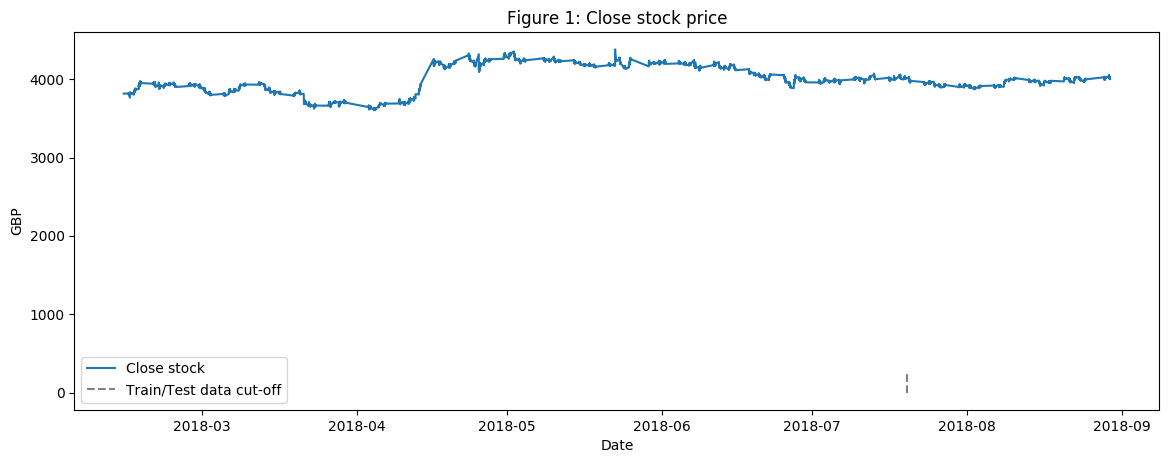

In [0]:
# Let's visualize the stock for the dataset sample size. The dashed vertical line represents the separation between training and test data.
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(data['Dates'], data['Close'], label='Close stock')
plt.vlines(datetime.date(2018,7, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('GBP')
plt.title('Figure 1: Close stock price')
plt.legend()
plt.show()

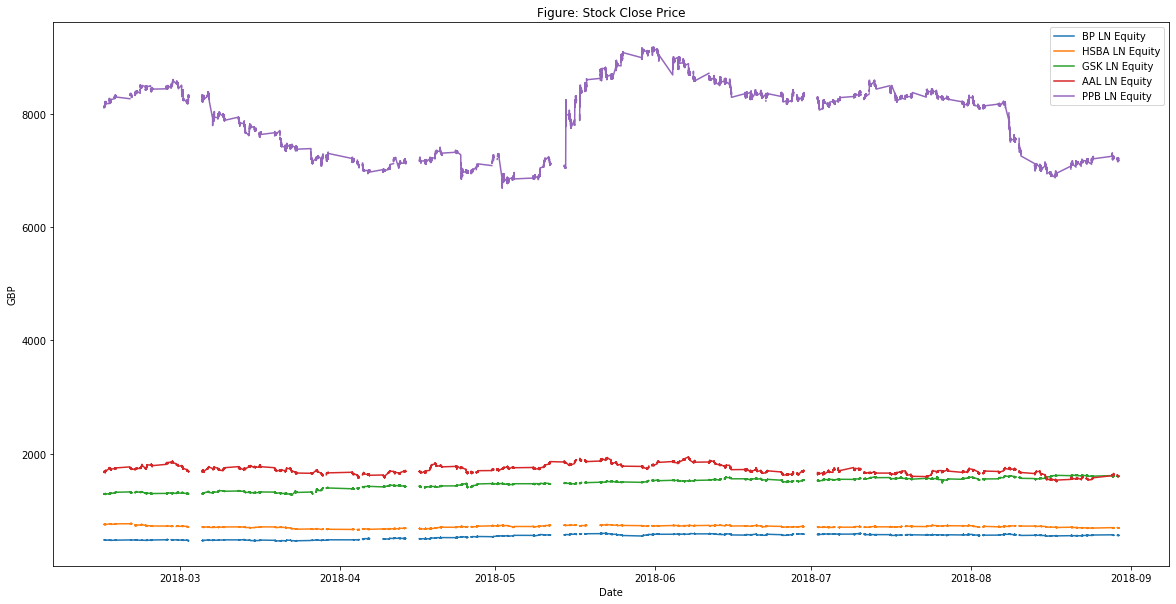

In [0]:
# Let's visualize the stock for the HFT dataset. 
plt.figure(figsize=(20, 10))
plt.plot(new_data ['BP LN Equity'], label='BP LN Equity')
plt.plot(new_data ['HSBA LN Equity'], label='HSBA LN Equity')
plt.plot(new_data ['GSK LN Equity'], label='GSK LN Equity')
plt.plot(new_data ['AAL LN Equity'], label='AAL LN Equity')
plt.plot(new_data ['PPB LN Equity'], label='PPB LN Equity')
plt.xlabel('Date')
plt.ylabel('GBP')
plt.title('Figure: Stock Close Price')
plt.legend()
plt.show()


In [0]:
num_training_days = int(new_data.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    new_data.shape[0]-num_training_days))

Number of training days: 36823. Number of test days: 15782.


In [0]:
#Save copy of dataframe
new_data_copy = new_data.copy()
df_AAL = new_data.copy()
df_BP = new_data.copy()
df_GSK = new_data.copy()
df_HSBA = new_data.copy()
df_PPB = new_data.copy()

In [0]:
data_AAL = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),sheet_name=sheets[100])
data_BP = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),sheet_name=sheets[85])
data_HSBA = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),sheet_name=sheets[63])
data_GSK = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),sheet_name=sheets[67])
data_PPB = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),sheet_name=sheets[39])

In [0]:
data_AAL1 = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),index_col="Dates",parse_dates=True,sheet_name=sheets[100])
data_BP1 = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),index_col="Dates",parse_dates=True,sheet_name=sheets[85])
data_HSBA1 = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),index_col="Dates",parse_dates=True,sheet_name=sheets[63])
data_GSK1 = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),index_col="Dates",parse_dates=True,sheet_name=sheets[67])
data_PPB1 = pd.read_excel(io.BytesIO(uploaded['HFT_Close - Copy.xlsx']),index_col="Dates",parse_dates=True,sheet_name=sheets[39])

#Test for data stationarity

1.Test Statistic         
2.p-value                
3.Lags Used               
4.Observations Used       
5.Critical Value (1%)    
6.Critical Value (5%)    
7.Critical Value (10%)

8.Rolling Mean

9.Standard Deviation

In [0]:
import statsmodels.tsa.stattools as ts

In [0]:
def dftest(timeseries):
    """This code is from a Metis lecture on testing for stationary data with the
    Dickey Fuller test for time series analysis. It takes in a time series and outputs statistics and graphics
    If the p value is <.05, then the data passes the test and is ready for ARMA models."""
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test AAL data stationarity:

Test Statistic             -2.521038
p-value                     0.110439
Lags Used                   2.000000
Observations Used       68164.000000
Critical Value (1%)        -3.430446
Critical Value (5%)        -2.861582
Critical Value (10%)       -2.566793
dtype: float64


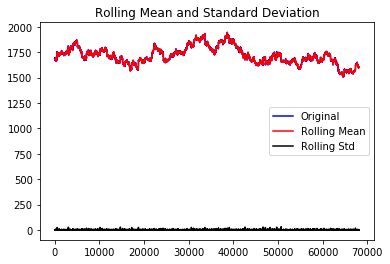

None
Test BP data stationarity:

Test Statistic             -1.388681
p-value                     0.587690
Lags Used                   5.000000
Observations Used       68443.000000
Critical Value (1%)        -3.430446
Critical Value (5%)        -2.861582
Critical Value (10%)       -2.566792
dtype: float64


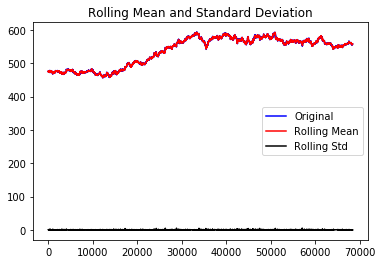

None
Test HSBA data stationarity:

Test Statistic             -2.259036
p-value                     0.185520
Lags Used                  21.000000
Observations Used       68264.000000
Critical Value (1%)        -3.430446
Critical Value (5%)        -2.861582
Critical Value (10%)       -2.566793
dtype: float64


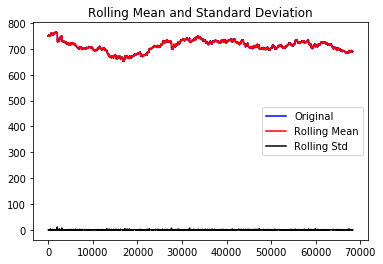

None
Test GSK data stationarity:

Test Statistic             -1.351739
p-value                     0.605182
Lags Used                  23.000000
Observations Used       67395.000000
Critical Value (1%)        -3.430447
Critical Value (5%)        -2.861583
Critical Value (10%)       -2.566793
dtype: float64


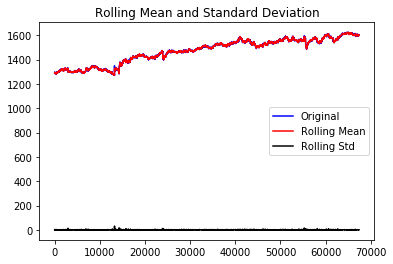

None
Test PPB data stationarity:

Test Statistic             -1.031738
p-value                     0.741513
Lags Used                  20.000000
Observations Used       30485.000000
Critical Value (1%)        -3.430565
Critical Value (5%)        -2.861635
Critical Value (10%)       -2.566820
dtype: float64


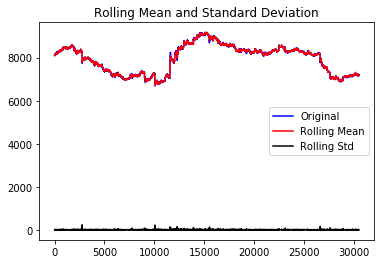

None


In [0]:
print("Test AAL data stationarity:\n")
print(dftest(data_AAL.Close))
print("Test BP data stationarity:\n")
print(dftest(data_BP.Close))
print("Test HSBA data stationarity:\n")
print(dftest(data_HSBA.Close))
print("Test GSK data stationarity:\n")
print(dftest(data_GSK.Close))
print("Test PPB data stationarity:\n")
print(dftest(data_PPB.Close))

In [0]:
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(12, 6))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

Seasonality EDA AAL data:



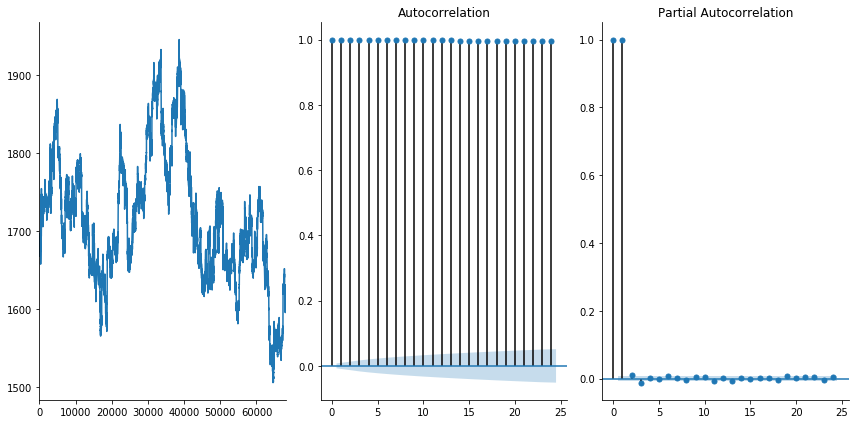

In [0]:
print("Seasonality EDA AAL data:\n")
plots(data_AAL.Close, lags=24)


Seasonality EDA BP data:



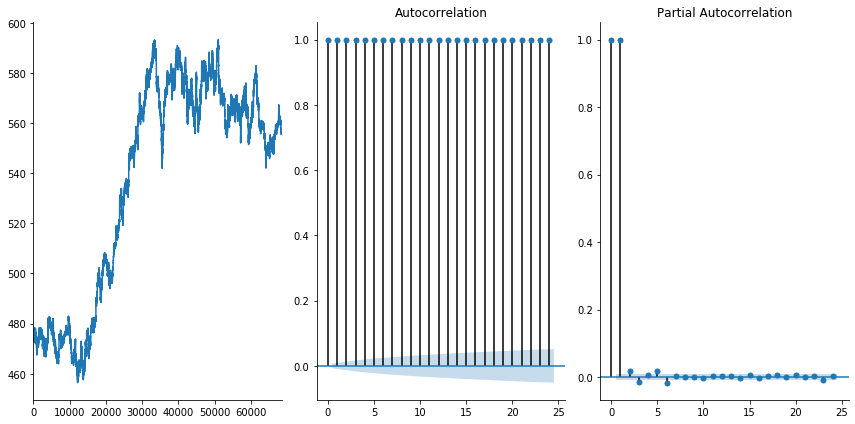

In [0]:
print("Seasonality EDA BP data:\n")
plots(data_BP.Close, lags=24)

Seasonality EDA HSBA data:



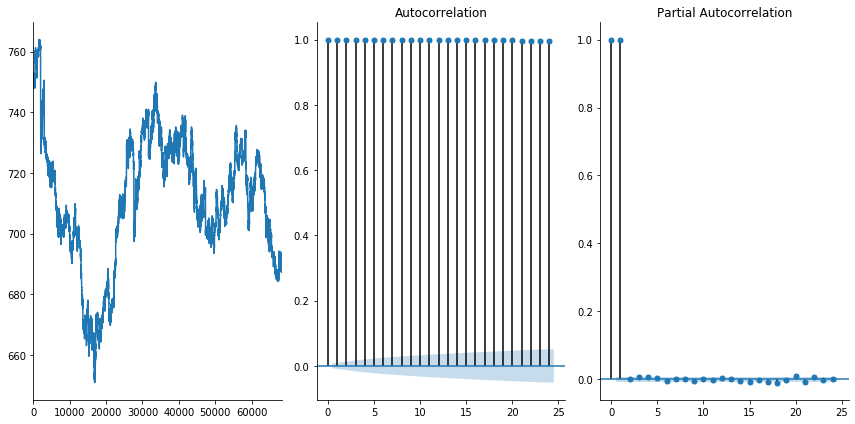

In [0]:
print("Seasonality EDA HSBA data:\n")
plots(data_HSBA.Close, lags=24)

Seasonality EDA GSK data:



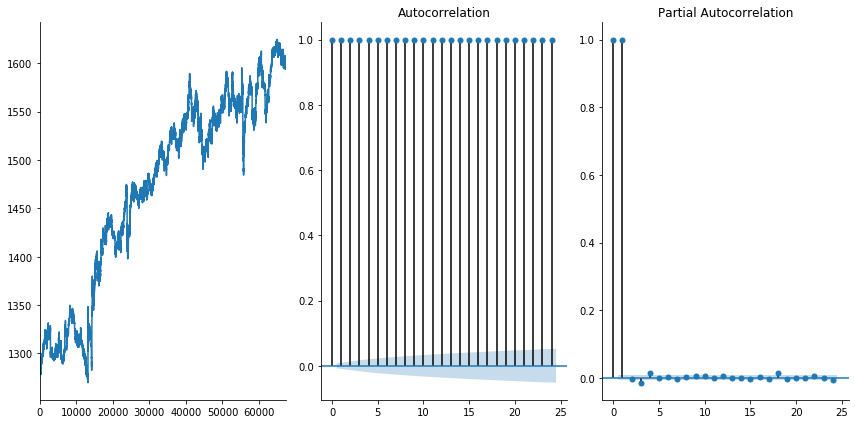

In [0]:
print("Seasonality EDA GSK data:\n")
plots(data_GSK.Close, lags=24)

Seasonality EDA PPB data:



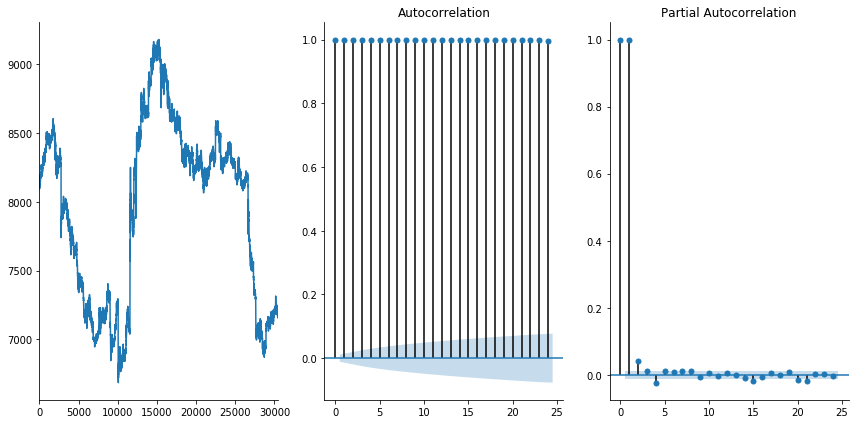

In [0]:
print("Seasonality EDA PPB data:\n")
plots(data_PPB.Close, lags=24)

#Preprocessing

#Correlation 

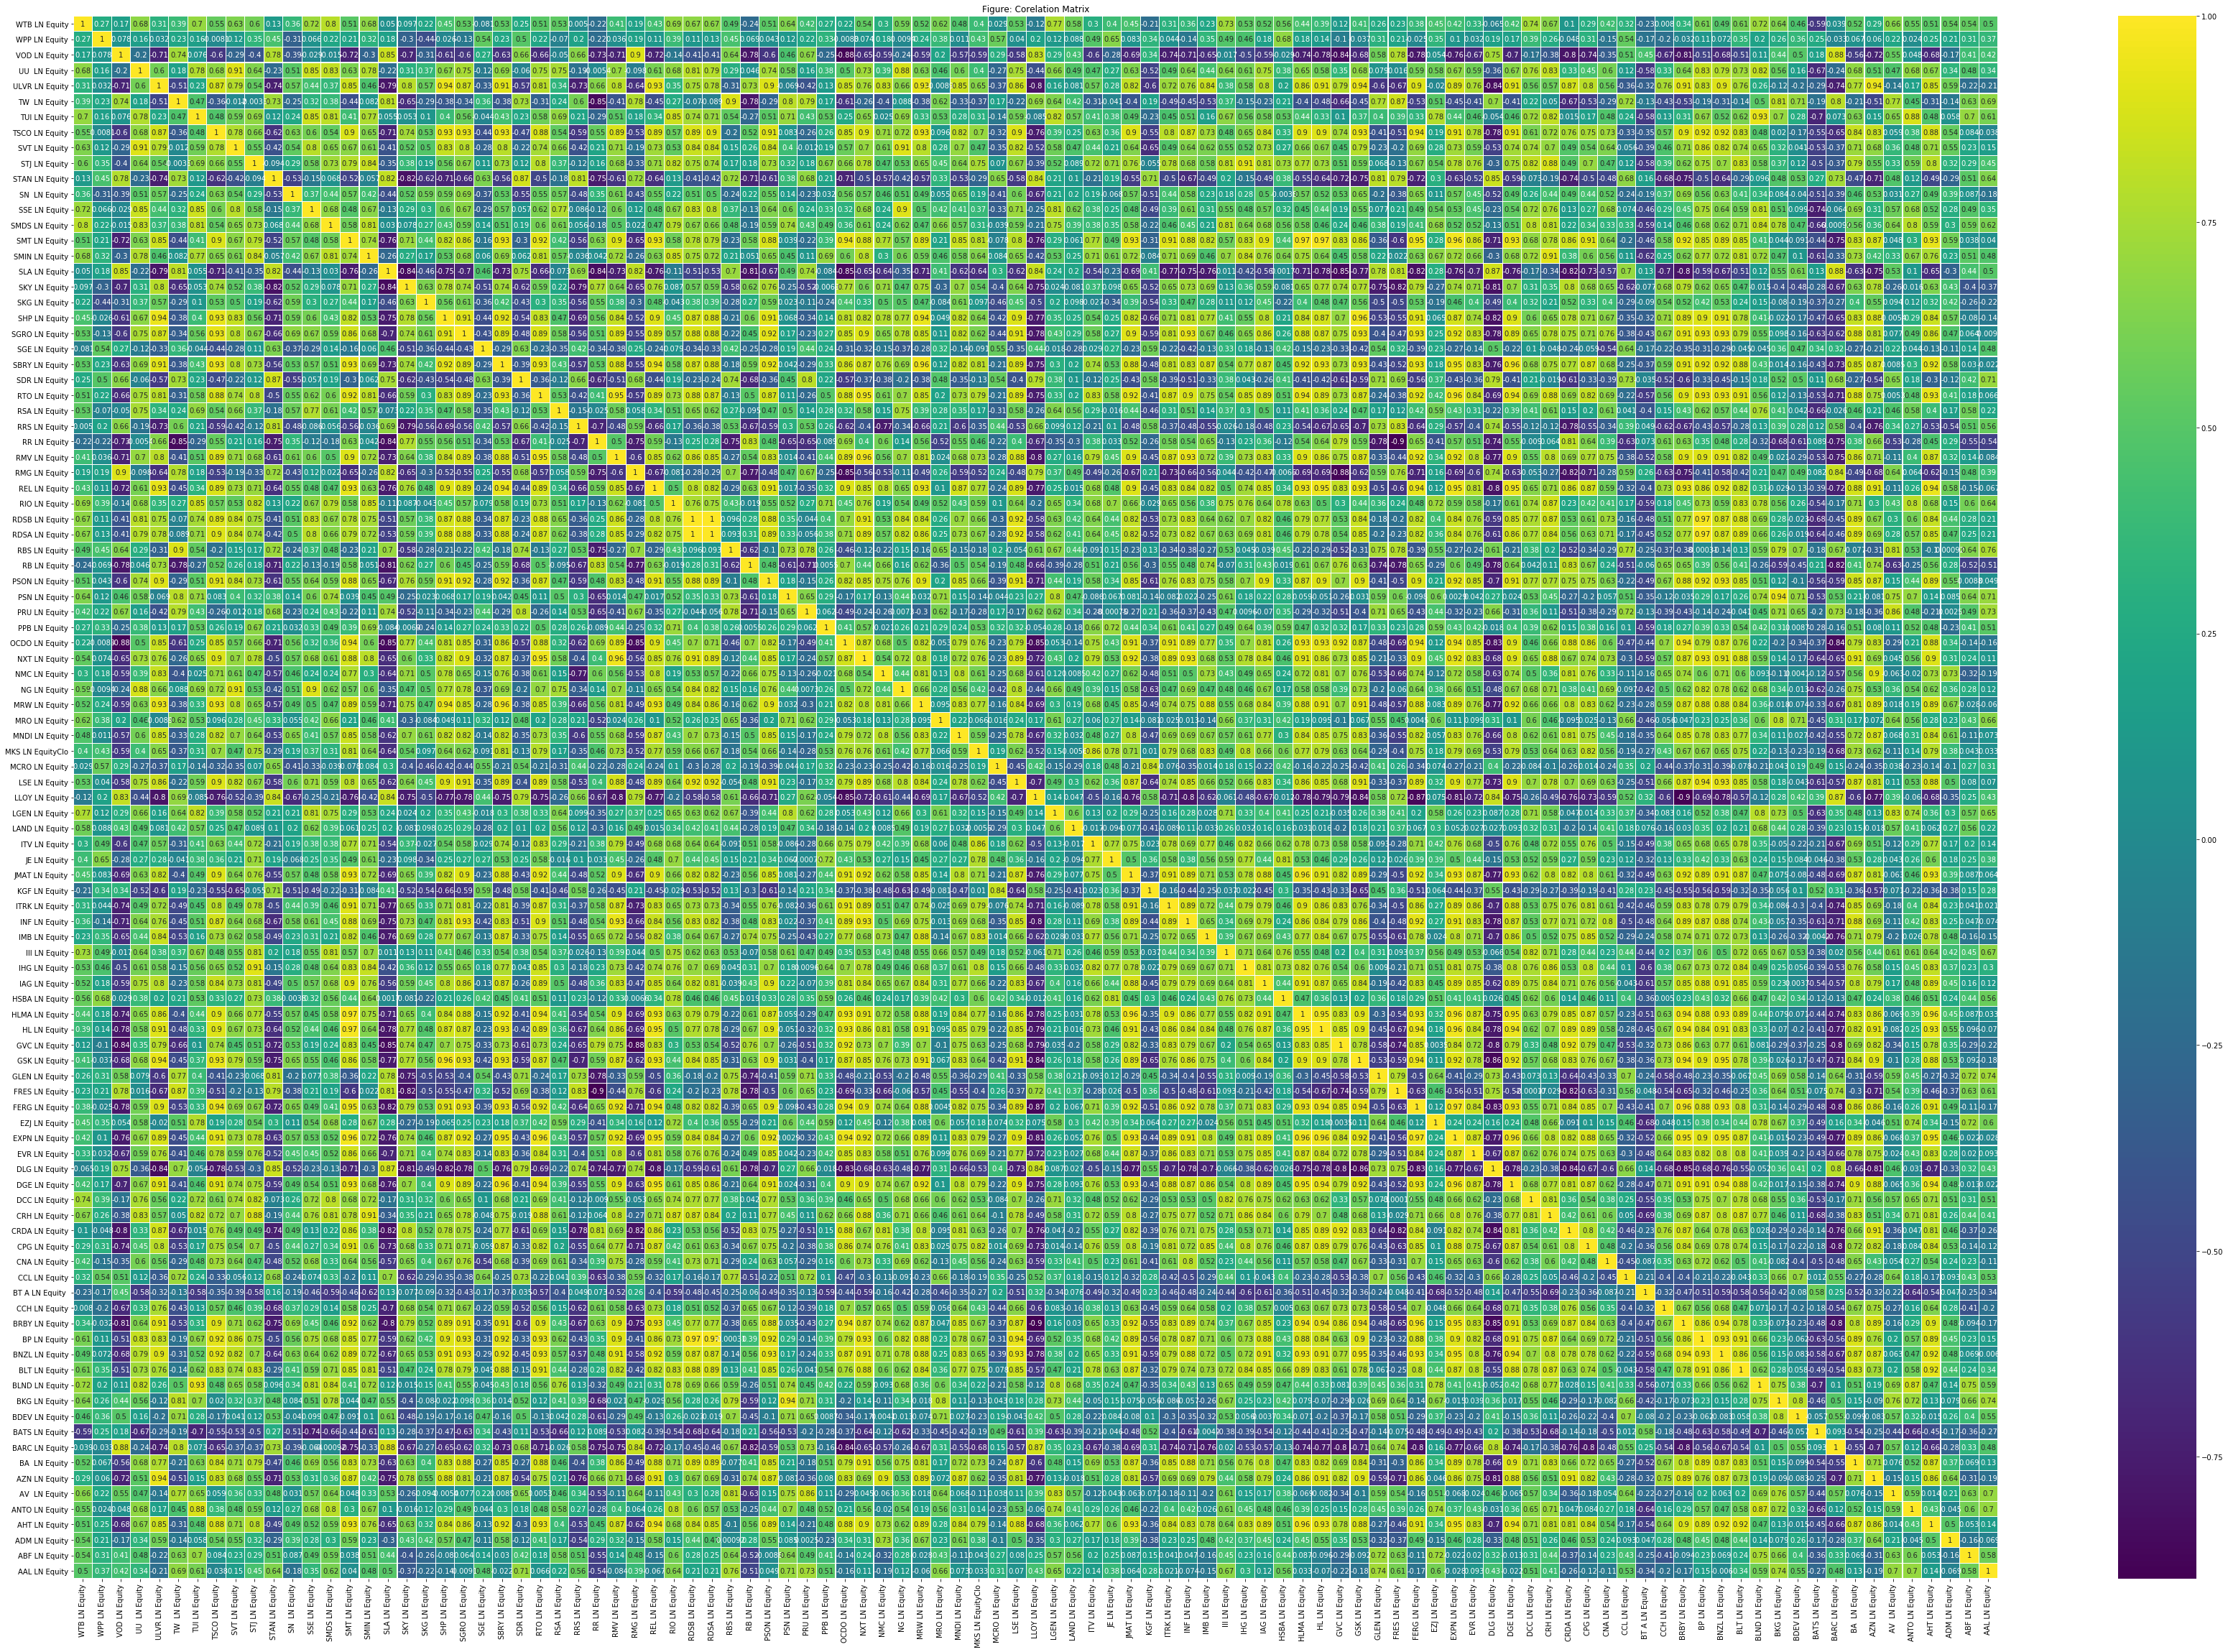

In [0]:
import seaborn as sns
cor1=new_data.corr(method='pearson')
plt.figure(figsize=(60, 40))
plt.title("Figure: Corelation Matrix")
cm=plt.cm.viridis
corr = sns.heatmap(cor1,cmap=cm,linewidths=0.1,linecolor='white',annot=True)
plt.show()

# Relevant Correlated Features


In [0]:
# We will only select features which has correlation of above 0.50 (taking absolute value) with the PPB LN Equity. 
# Correlation with target
cor_target_AAL = abs(cor1["AAL LN Equity"])
cor_target_BP = abs(cor1["BP LN Equity"])
cor_target_GSK = abs(cor1["GSK LN Equity"])
cor_target_HSBA = abs(cor1["HSBA LN Equity"])
cor_target_PPB = abs(cor1["PPB LN Equity"])
#Selecting highly correlated features
relevant_features_AAL = cor_target_AAL[cor_target_AAL>0.50]
relevant_features_BP = cor_target_BP[cor_target_BP>0.50]
relevant_features_GSK = cor_target_GSK[cor_target_GSK>0.50]
relevant_features_HSBA = cor_target_HSBA[cor_target_HSBA>0.50]
relevant_features_PPB = cor_target_PPB[cor_target_PPB>0.50]
print("Relevant Features AAL:\n")
print(relevant_features_AAL)
print("Relevant Features BP:\n")
print(relevant_features_BP)
print("Relevant Features GSK:\n")
print(relevant_features_GSK)
print("Relevant Features HSBA:\n")
print(relevant_features_HSBA)
print("Relevant Features PPB:\n")
print(relevant_features_PPB)

Relevant Features AAL:

WTB LN Equity     0.500794
TW  LN Equity     0.686818
TUI LN Equity     0.611360
STAN LN Equity    0.639621
SMDS LN Equity    0.621525
SDR LN Equity     0.710755
RRS LN Equity     0.557478
RR LN Equity      0.535014
RIO LN Equity     0.643488
RBS LN Equity     0.757077
RB LN Equity      0.511879
PSN LN Equity     0.708350
PRU LN Equity     0.733628
PPB LN Equity     0.505635
MRO LN Equity     0.662135
LGEN LN Equity    0.652528
III LN Equity     0.667041
HSBA LN Equity    0.562662
GLEN LN Equity    0.736095
FRES LN Equity    0.607976
EZJ LN Equity     0.604897
DCC LN Equity     0.506364
CCL LN Equity     0.528555
BLND LN Equity    0.588972
BKG LN Equity     0.743668
BDEV LN Equity    0.547362
AV  LN Equity     0.696865
ANTO LN Equity    0.698254
ABF LN Equity     0.584373
AAL LN Equity     1.000000
Name: AAL LN Equity, dtype: float64
Relevant Features BP:

WTB LN Equity     0.611654
VOD LN Equity     0.513462
UU  LN Equity     0.833843
ULVR LN Equity    0.831831

In [0]:
#Selecting highly un-correlated features
Irrelevant_features_AAL = cor_target_AAL[cor_target_AAL<0.50]
Irrelevant_features_BP = cor_target_BP[cor_target_BP<0.50]
Irrelevant_features_GSK = cor_target_GSK[cor_target_GSK<0.50]
Irrelevant_features_HSBA = cor_target_HSBA[cor_target_HSBA<0.50]
Irrelevant_features_PPB = cor_target_PPB[cor_target_PPB<0.50]
print("Irrelevant Features_AAL:\n")
print(Irrelevant_features_AAL)
print("Irrelevant Features_BP:\n")
print(Irrelevant_features_BP)
print("Irrelevant Features_GSK:\n")
print(Irrelevant_features_GSK)
print("Irrelevant Features_HSBA:\n")
print(Irrelevant_features_HSBA)
print("Irrelevant Features_PPB:\n")
print(Irrelevant_features_PPB)

Irrelevant Features_AAL:

WPP LN Equity     0.367195
VOD LN Equity     0.421949
UU  LN Equity     0.343644
ULVR LN Equity    0.214123
TSCO LN Equity    0.037875
                    ...   
BARC LN Equity    0.476367
BA  LN Equity     0.126452
AZN LN Equity     0.188833
AHT LN Equity     0.144932
ADM LN Equity     0.068785
Name: AAL LN Equity, Length: 71, dtype: float64
Irrelevant Features_BP:

WPP LN Equity     0.106133
TW  LN Equity     0.187642
STAN LN Equity    0.497064
SKG LN Equity     0.421907
SGE LN Equity     0.308829
SDR LN Equity     0.331253
RRS LN Equity     0.425325
RR LN Equity      0.346201
RMG LN Equity     0.407092
RBS LN Equity     0.000307
RB LN Equity      0.394113
PSN LN Equity     0.285261
PRU LN Equity     0.136013
PPB LN Equity     0.388601
MRO LN Equity     0.231815
MCRO LN Equity    0.314847
LAND LN Equity    0.351652
JE LN Equity      0.420734
HSBA LN Equity    0.431272
GLEN LN Equity    0.234516
FRES LN Equity    0.320733
EZJ LN Equity     0.377275
CCL LN Equ

In [0]:
#Drop non-relevant features
df_AAL.drop(['WPP LN Equity', 'VOD LN Equity', 'UU  LN Equity', 'ULVR LN Equity', 'TSCO LN Equity', 'SVT LN Equity', 'STJ LN Equity', 'SN  LN Equity', 'SSE LN Equity', 'SMT LN Equity', 'SMIN LN Equity', 'SLA LN Equity', 'SKY LN Equity', 'SKG LN Equity', 'SHP LN Equity', 'SGRO LN Equity', 'SGE LN Equity', 'SBRY LN Equity', 'RTO LN Equity', 'RSA LN Equity', 'RMV LN Equity', 'RMG LN Equity', 'REL LN Equity', 'RIO LN Equity', 'RDSB LN Equity', 'RDSA LN Equity', 'PSON LN Equity', 'OCDO LN Equity', 'NXT LN Equity', 'NMC LN Equity', 'NG LN Equity', 'MRW LN Equity', 'MNDI LN Equity', 'MKS LN EquityClo', 'MCRO LN Equity', 'LSE LN Equity', 'LLOY LN Equity', 'LAND LN Equity', 'ITV LN Equity', 'JE LN Equity', 'JMAT LN Equity', 'KGF LN Equity', 'ITRK LN Equity', 'INF LN Equity', 'IMB LN Equity', 'IHG LN Equity', 'IAG LN Equity', 'HLMA LN Equity', 'HL LN Equity', 'GVC LN Equity', 'GSK LN Equity', 'FERG LN Equity', 'EXPN LN Equity', 'EVR LN Equity', 'DLG LN Equity', 'DGE LN Equity', 'CRH LN Equity', 'CRDA LN Equity', 'CPG LN Equity', 'CNA LN Equity', 'BT A LN Equity ', 'CCH LN Equity', 'BRBY LN Equity', 'BP LN Equity', 'BNZL LN Equity', 'BLT LN Equity', 'BATS LN Equity', 'BARC LN Equity', 'BA  LN Equity', 'AZN LN Equity', 'AHT LN Equity', 'ADM LN Equity'], axis=1, inplace=True)

df_BP.drop(['WPP LN Equity', 'TW  LN Equity', 'STAN LN Equity', 'SKG LN Equity', 'SDR LN Equity', 'RRS LN Equity', 'RR LN Equity','RMG LN Equity', 'RBS LN Equity', 'RB LN Equity', 'PSN LN Equity', 'PRU LN Equity', 'PPB LN Equity', 'MRO LN Equity', 'LAND LN Equity', 'JE LN Equity', 'HSBA LN Equity', 'GLEN LN Equity', 'FRES LN Equity', 'EZJ LN Equity', 'CCL LN Equity', 'BKG LN Equity', 'BDEV LN Equity', 'AV  LN Equity', 'ADM LN Equity', 'ABF LN Equity', 'AAL LN Equity'], axis=1, inplace=True)

df_HSBA.drop(['VOD LN Equity', 'UU  LN Equity', 'ULVR LN Equity', 'TW  LN Equity', 'TSCO LN Equity', 'SVT LN Equity',  'STAN LN Equity', 'SN  LN Equity', 'SSE LN Equity', 'SMT LN Equity', 'SLA LN Equity', 'SKY LN Equity', 'SKG LN Equity', 'SHP LN Equity', 'SGRO LN Equity', 'SGE LN Equity', 'SBRY LN Equity', 'SDR LN Equity', 'RSA LN Equity', 'RRS LN Equity', 'RR LN Equity', 'RMV LN Equity', 'RMG LN Equity', 'REL LN Equity', 'RDSB LN Equity', 'RDSA LN Equity', 'RBS LN Equity', 'RB LN Equity', 'PSON LN Equity', 'PSN LN Equity', 'PRU LN Equity', 'OCDO LN Equity', 'NXT LN Equity', 'NMC LN Equity', 'NG LN Equity', 'MRW LN Equity', 'MRO LN Equity', 'MNDI LN Equity', 'MCRO LN Equity', 'LSE LN Equity', 'LLOY LN Equity', 'LGEN LN Equity', 'LAND LN Equity', 'JMAT LN Equity', 'KGF LN Equity', 'ITRK LN Equity', 'INF LN Equity', 'IMB LN Equity', 'IAG LN Equity', 'HLMA LN Equity', 'HL LN Equity', 'GVC LN Equity', 'GSK LN Equity', 'GLEN LN Equity', 'FRES LN Equity', 'FERG LN Equity', 'EXPN LN Equity', 'EVR LN Equity', 'DLG LN Equity', 'DGE LN Equity', 'CRDA LN Equity', 'CPG LN Equity', 'CNA LN Equity', 'CCL LN Equity', 'BT A LN Equity ', 'CCH LN Equity', 'BRBY LN Equity', 'BP LN Equity', 'BNZL LN Equity', 'BLND LN Equity', 'BKG LN Equity', 'BDEV LN Equity', 'BATS LN Equity', 'BARC LN Equity', 'BA  LN Equity', 'AZN LN Equity', 'AV  LN Equity', 'ANTO LN Equity', 'ADM LN Equity', 'ABF LN Equity'], axis=1, inplace=True)

df_GSK.drop(['WTB LN Equity', 'WPP LN Equity', 'TW  LN Equity', 'TUI LN Equity', 'SMDS LN Equity', 'SGE LN Equity', 'RSA LN Equity', 'RIO LN Equity', 'RBS LN Equity', 'PSN LN Equity', 'PRU LN Equity', 'PPB LN Equity', 'MRO LN Equity', 'MCRO LN Equity', 'LGEN LN Equity', 'LAND LN Equity', 'JE LN Equity', 'III LN Equity', 'HSBA LN Equity', 'EZJ LN Equity', 'CCL LN Equity', 'BT A LN Equity ', 'BLND LN Equity', 'BKG LN Equity', 'BDEV LN Equity', 'BATS LN Equity', 'AV  LN Equity', 'ANTO LN Equity', 'ABF LN Equity', 'AAL LN Equity'], axis=1, inplace=True)

df_PPB.drop(['WTB LN Equity', 'WPP LN Equity', 'VOD LN Equity', 'UU  LN Equity', 'ULVR LN Equity', 'TW  LN Equity', 'TSCO LN Equity', 'SVT LN Equity', 'STAN LN Equity', 'SN  LN Equity', 'SSE LN Equity', 'SMDS LN Equity', 'SMT LN Equity', 'SLA LN Equity', 'SKY LN Equity', 'SKG LN Equity', 'SHP LN Equity', 'SGRO LN Equity', 'SGE LN Equity', 'SBRY LN Equity', 'SDR LN Equity', 'RSA LN Equity', 'RRS LN Equity', 'RR LN Equity', 'RMV LN Equity', 'RMG LN Equity', 'REL LN Equity', 'RDSB LN Equity', 'RDSA LN Equity', 'RBS LN Equity', 'RB LN Equity', 'PSON LN Equity', 'PSN LN Equity', 'PRU LN Equity', 'OCDO LN Equity', 'NMC LN Equity', 'NG LN Equity', 'MRW LN Equity', 'MRO LN Equity', 'MNDI LN Equity', 'MCRO LN Equity', 'LSE LN Equity', 'LLOY LN Equity', 'LGEN LN Equity', 'LAND LN Equity', 'JMAT LN Equity', 'KGF LN Equity', 'INF LN Equity', 'IMB LN Equity', 'III LN Equity', 'IAG LN Equity', 'HLMA LN Equity', 'HL LN Equity', 'GVC LN Equity', 'GSK LN Equity', 'GLEN LN Equity', 'FRES LN Equity', 'FERG LN Equity', 'EXPN LN Equity', 'EVR LN Equity', 'DLG LN Equity', 'DGE LN Equity', 'DCC LN Equity', 'CRDA LN Equity', 'CPG LN Equity', 'CNA LN Equity', 'CCL LN Equity', 'CCH LN Equity', 'BRBY LN Equity', 'BP LN Equity', 'BNZL LN Equity', 'BLND LN Equity', 'BKG LN Equity', 'BDEV LN Equity', 'BATS LN Equity', 'BARC LN Equity', 'AZN LN Equity', 'AV  LN Equity', 'AHT LN Equity', 'ADM LN Equity', 'ABF LN Equity'], axis=1, inplace=True)

In [0]:
#fill NaN values with 0
df_AAL.fillna(0, inplace=True)
df_BP.fillna(0, inplace=True)
df_HSBA.fillna(0, inplace=True)
df_GSK.fillna(0, inplace=True)
df_PPB.fillna(0, inplace=True)

In [0]:
num_training_days_AAL = int(data_AAL.shape[0]*.7)
print('Number of training days AAL: {}. Number of test days: {}.'.format(num_training_days_AAL, \
                                                                    data_AAL.shape[0]-num_training_days_AAL))

num_training_days_BP = int(data_BP.shape[0]*.7)
print('Number of training days BP: {}. Number of test days: {}.'.format(num_training_days_BP, \
                                                                    data_BP.shape[0]-num_training_days_BP))

num_training_days_HSBA = int(data_HSBA.shape[0]*.7)
print('Number of training days HSBA: {}. Number of test days: {}.'.format(num_training_days_HSBA, \
                                                                    data_HSBA.shape[0]-num_training_days_HSBA))

num_training_days_GSK = int(data_GSK.shape[0]*.7)
print('Number of training days GSK: {}. Number of test days: {}.'.format(num_training_days_GSK, \
                                                                    data_GSK.shape[0]-num_training_days_GSK))
num_training_days_PPB = int(data_PPB.shape[0]*.7)
print('Number of training days PPB: {}. Number of test days: {}.'.format(num_training_days_PPB, \
                                                                    data_PPB.shape[0]-num_training_days_PPB))

Number of training days AAL: 47716. Number of test days: 20451.
Number of training days BP: 47914. Number of test days: 20535.
Number of training days HSBA: 47800. Number of test days: 20486.
Number of training days GSK: 47193. Number of test days: 20226.
Number of training days PPB: 21354. Number of test days: 9152.


# Train-Test-Split

In [0]:
X_AAL = data_AAL1.values
train_size_AAL = int(len(X_AAL) * 0.70)
train_data_AAL, test_data_AAL = X_AAL[0:train_size_AAL], X_AAL[train_size_AAL:len(X_AAL)]
print('Observations AAL: %d' % (len(X_AAL)))
print('Training Observations AAL: %d' % (len(train_data_AAL)))
print('Testing Observations AAL: %d' % (len(test_data_AAL)))
#plt.plot(train_data_AAL)
#plt.plot([None for i in train_data_AAL] + [x for x in test_data_AAL])
#plt.xlabel('Dates')
#plt.ylabel('Close Prices')
#plt.show()
#plt.legend()

Observations AAL: 68167
Training Observations AAL: 47716
Testing Observations AAL: 20451


In [0]:
from sklearn.model_selection import train_test_split
y1 = data_AAL1.Close # define the Close variable (dependent variable) as y
train_data, test_data, y1_train, y1_test = train_test_split(data_AAL1, y1, test_size=0.3)
print (train_data.shape, y1_train.shape)
print (test_data.shape, y1_test.shape)

(47716, 1) (47716,)
(20451, 1) (20451,)


In [0]:
train_data, test_data = data_AAL1[0:-20451], data_AAL1[-20451:]

#Linear Regression

In [0]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
X_LR = data_AAL1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y_LR = data_AAL1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_LR, Y_LR)  # perform linear regression
Y_pred = linear_regressor.predict(X_LR) 

# ARMA Model


In [0]:
# ARMA model
train_arma = train_data['Close']
test_arma = test_data['Close']

history = [x for x in train_arma]
y = test_arma
# make first prediction
predictions = list()
model = ARMA(history, order=(1,8))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)

history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARMA(history, order=(1,8))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
plt.figure(figsize=(14,8))
plt.plot(data_AAL1.index, data_AAL1['Close'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data_AAL1.index[-100:], data_AAL1['Close'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

#ARIMA Model

In [0]:
# ARIMA model
train_arima = train_data['Close']
test_arima = test_data['Close']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
  # predict
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    
plt.figure(figsize=(14,8))
plt.plot(data_AAL1.index, data_AAL1['Close'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data_AAL1.index[-600:], data_AAL1['Close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

# LSTM

In [0]:
train = train_data.iloc[:, 0:1].values # selecting open prices
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 
# Train dataset
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

In [0]:
model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 65, batch_size = 16)

In [0]:
# this will be used later while comparing and visualization
real_stock_price = test_data.iloc[:,0:1].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on timesteps previous dates  
combine = pd.concat((train_data['Close'], test_data['Close']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data_AAL1.index[-600:], data_AAL1['Close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('AAL LN Equity Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL LN Equity Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('lstm_30.pdf')
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))

#FBProphet

In [0]:
# Facebook Prophet - # Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
# The input to Prophet is always a dataframe with two columns: ds and y. 
# The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
# The y column must be numeric, and represents the measurement we wish to forecast.


# Drop the columns
ph_df_train = train_data
ph_df_train['Dates'] = ph_df_train.index
ph_df_train.rename(columns={'Close': 'y', 'Dates': 'ds'}, inplace=True)

prop = Prophet(changepoint_prior_scale=0.1)
prop.fit(ph_df_train)
# Create Future dates
future_prices = prop.make_future_dataframe(periods=73)

# Predict Prices
forecast = prop.predict(future_prices)

In [0]:
plt.figure(figsize=(14,8))
plt.plot(data_AAL1.index, data_AAL1['Close'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, test_data['Close'], color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, forecast['yhat'][-73:], color = 'blue', label = 'Predicted Stock Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-73:], forecast['yhat_upper'][-73:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data_AAL1.index[-600:], data_AAL1['Close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, test_data['Close'], color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, forecast['yhat'][-73:], color = 'blue', label = 'Predicted Stock Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-73:], forecast['yhat_upper'][-73:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(test_data['Close'], forecast['yhat'][-73:])))
print('MAE: '+str(mean_absolute_error(test_data['Close'], forecast['yhat'][-73:])))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Close'], forecast['yhat'][-73:]))))

# Trend Analysis
# 1.Seasonal decompose

<Figure size 1152x576 with 0 Axes>

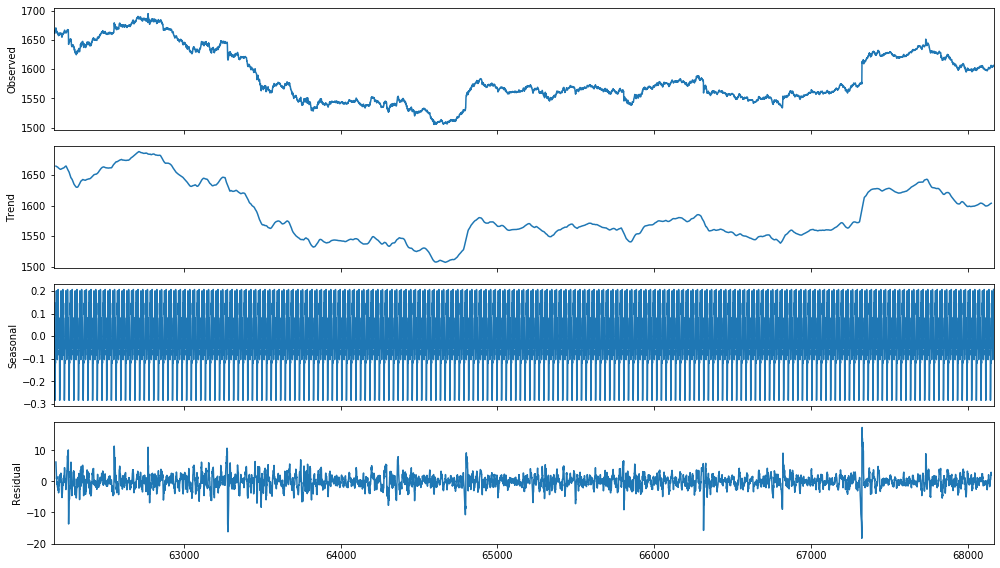

             t       t+1       t+5      t+10      t+30
t     1.000000  0.999174  0.998152  0.994080  0.999792
t+1   0.999174  1.000000  0.998967  0.994886  0.998967
t+5   0.998152  0.998967  1.000000  0.995889  0.997951
t+10  0.994080  0.994886  0.995889  1.000000  0.993879
t+30  0.999792  0.998967  0.997951  0.993879  1.000000


In [0]:
rcParams['figure.figsize'] = 14, 8
data_SD1 = data_AAL['Close']
result1 = seasonal_decompose(data_SD1[-6000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result1.plot()
plt.show()

values1 = DataFrame(data_AAL['Close'].values)
dataframe1 = concat([values1.shift(1),values1.shift(5),values1.shift(10),values1.shift(30), values1], axis=1)
dataframe1.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result1 = dataframe1.corr()
print(result1)

<Figure size 1152x576 with 0 Axes>

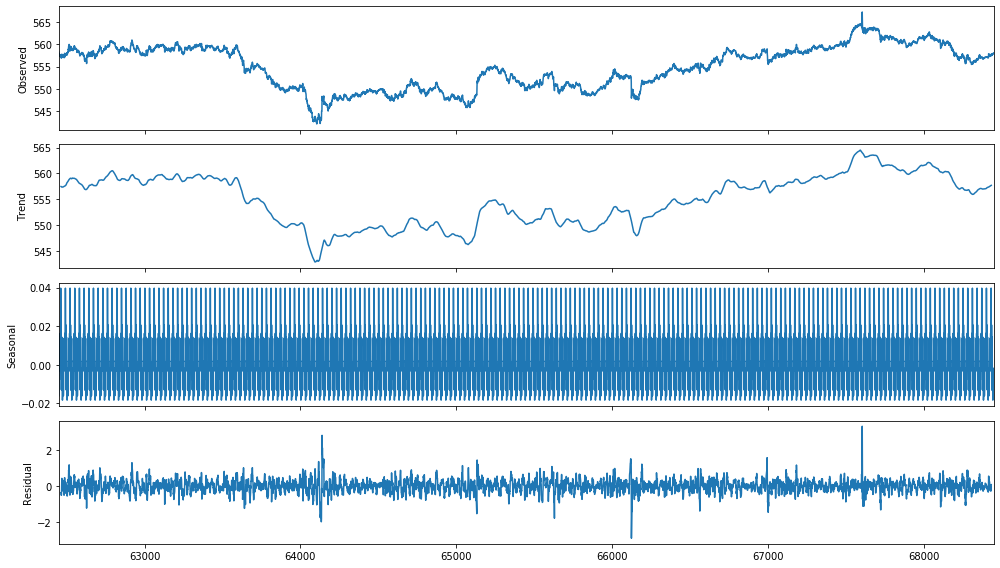

             t       t+1       t+5      t+10      t+30
t     1.000000  0.999905  0.999789  0.999338  0.999976
t+1   0.999905  1.000000  0.999882  0.999425  0.999882
t+5   0.999789  0.999882  1.000000  0.999536  0.999766
t+10  0.999338  0.999425  0.999536  1.000000  0.999316
t+30  0.999976  0.999882  0.999766  0.999316  1.000000


In [0]:
rcParams['figure.figsize'] = 14, 8
data_SD2 = data_BP['Close']
result2 = seasonal_decompose(data_SD2[-6000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result2.plot()
plt.show()

values = DataFrame(data_BP['Close'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

<Figure size 1152x576 with 0 Axes>

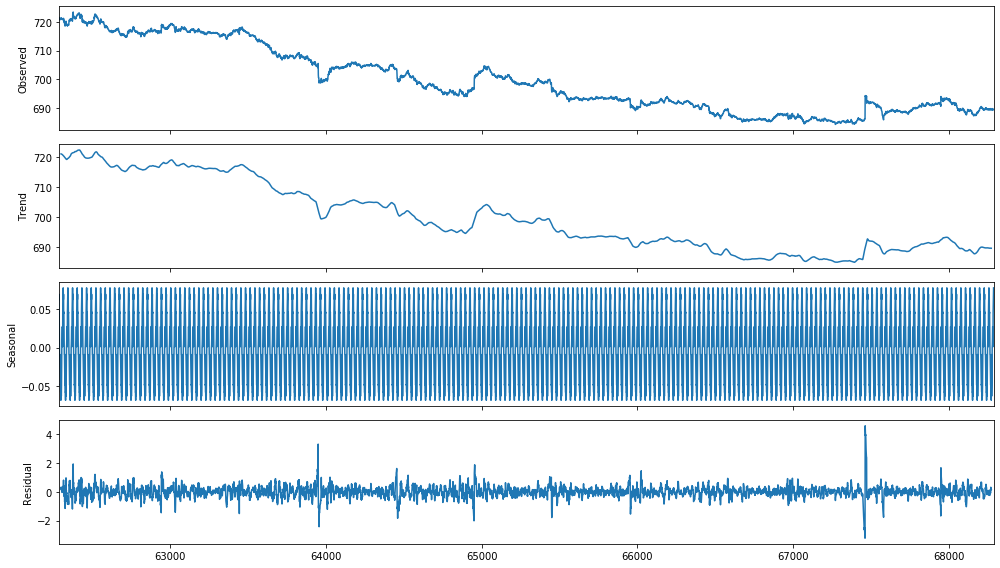

             t       t+1       t+5      t+10      t+30
t     1.000000  0.999541  0.998985  0.996643  0.999883
t+1   0.999541  1.000000  0.999432  0.997119  0.999432
t+5   0.998985  0.999432  1.000000  0.997712  0.998872
t+10  0.996643  0.997119  0.997712  1.000000  0.996524
t+30  0.999883  0.999432  0.998872  0.996524  1.000000


In [0]:
rcParams['figure.figsize'] = 14, 8
data_SD3 = data_HSBA['Close']
result3 = seasonal_decompose(data_SD3[-6000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result3.plot()
plt.show()

values = DataFrame(data_HSBA['Close'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

<Figure size 1152x576 with 0 Axes>

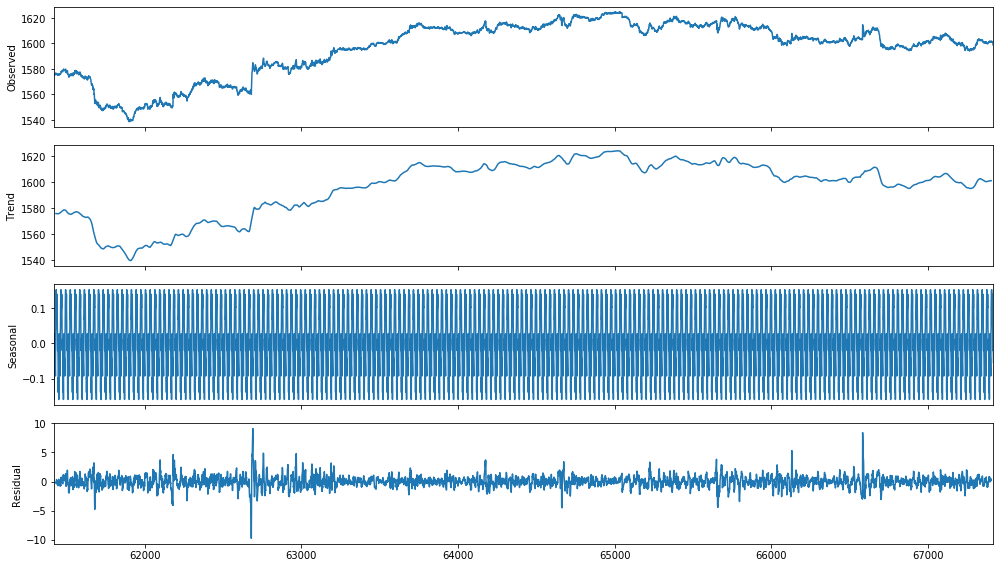

             t       t+1       t+5      t+10      t+30
t     1.000000  0.999880  0.999738  0.999178  0.999969
t+1   0.999880  1.000000  0.999851  0.999290  0.999851
t+5   0.999738  0.999851  1.000000  0.999428  0.999710
t+10  0.999178  0.999290  0.999428  1.000000  0.999150
t+30  0.999969  0.999851  0.999710  0.999150  1.000000


In [0]:
rcParams['figure.figsize'] = 14, 8
data_SD4 = data_GSK['Close']
result4 = seasonal_decompose(data_SD4[-6000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result4.plot()
plt.show()

values = DataFrame(data_GSK['Close'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

<Figure size 1152x576 with 0 Axes>

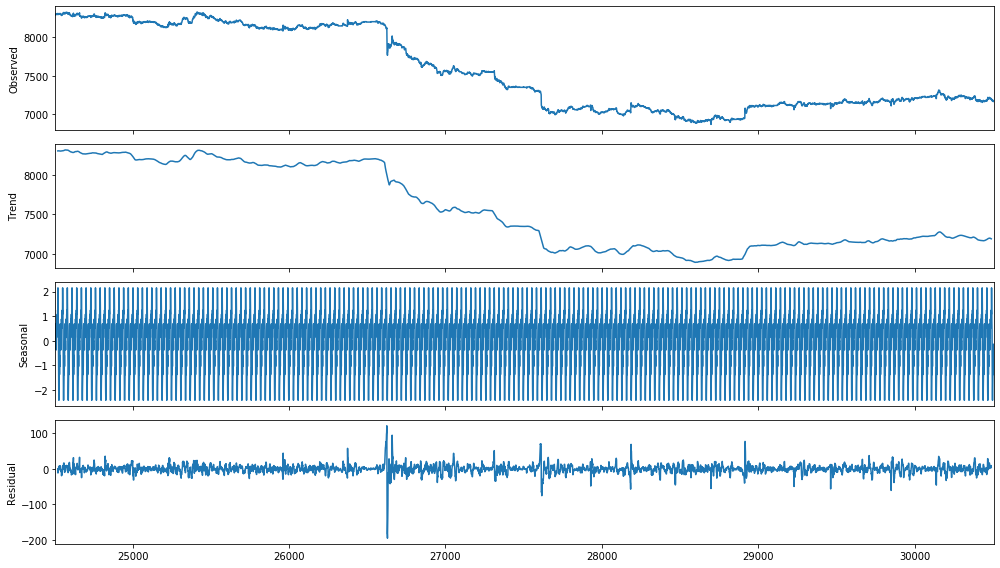

             t       t+1       t+5      t+10      t+30
t     1.000000  0.999571  0.999061  0.996915  0.999886
t+1   0.999571  1.000000  0.999465  0.997372  0.999465
t+5   0.999061  0.999465  1.000000  0.997925  0.998962
t+10  0.996915  0.997372  0.997925  1.000000  0.996798
t+30  0.999886  0.999465  0.998962  0.996798  1.000000


In [0]:
rcParams['figure.figsize'] = 14, 8
data_SD5 = data_PPB['Close']
result5 = seasonal_decompose(data_SD5[-6000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result5.plot()
plt.show()


values = DataFrame(data_PPB['Close'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

# 2.FFT Trend Analysis

# Fundamental analysis - News Trend
For fundamental analysis we will perform sentiment analysis on all daily news about companies. 

We will read all daily news for GS and extract whether the total sentiment about company on that day is positive, neutral, or negative (as a score from 0 to 1). As many investors closely read the news and make investment decisions based (partially of course) on news, there is a somewhat high chance that if, say, the news for PPN LN Equity today are extremely positive the stock will surge tomorrow. One crucial point, we will perform feature importance (meaning how indicative it is for the movement of PPB LN) on absolutely every feature (including this one) later on and decide whether we will use it.
       For the purpose of creating accurate sentiment prediction we will use Neural Language Processing (NLP). We will use BERT - Google's recently announced NLP approach for transfer learning for sentiment classification stock news sentiment extraction.

#FFT
Fourier transforms take a function and create a series of sine waves (with different amplitudes and frames). When combined, these sine waves approximate the original function. Mathematically speaking, the transforms look like this:

$$G(f) = \int_{-\infty}^\infty g(t) e^{-i 2 \pi f t} dt$$

We will use Fourier transforms to extract global and local trends in the PPN LN Equity, and to also denoise it a little. 

In [0]:
!python3 -m pip install bert

  Created wheel for bert: filename=bert-2.2.0-cp36-none-any.whl size=3756 sha256=82833d3e397cb61db43c77111c9bfebf751f9319a4a8f4715b1003309c2b1fa4
  Stored in directory: /root/.cache/pip/wheels/fe/71/b7/941459453bd38e5d97a8c886361dee19325e9933c9cf88ad46
  Created wheel for erlastic: filename=erlastic-2.0.0-cp36-none-any.whl size=6786 sha256=7a069ce79e4f7fb6e96e3324e2d41d93d73750ad07a1928287b998a2ad2f2b03
  Stored in directory: /root/.cache/pip/wheels/02/62/46/93c713a5f061aeeb4f16eb6bf5ee798816e6ddda70faa78e69
Successfully built bert erlastic


In [0]:
# just import bert
import bert
data_FT = data_AAL[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

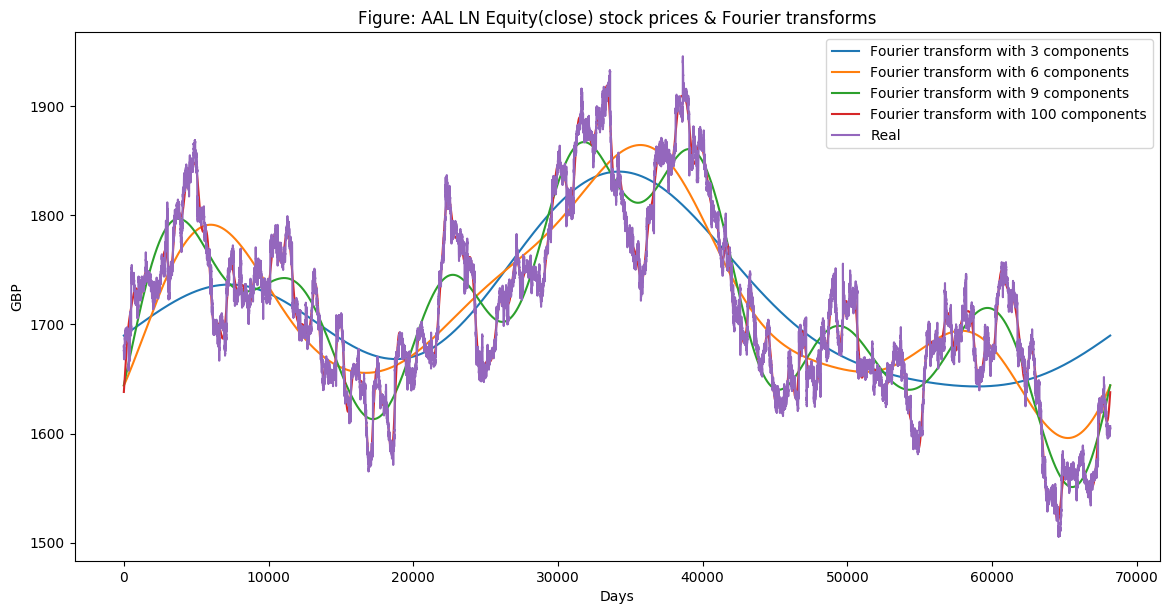

In [0]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: AAL LN Equity(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [0]:
data_FT = data_BP[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

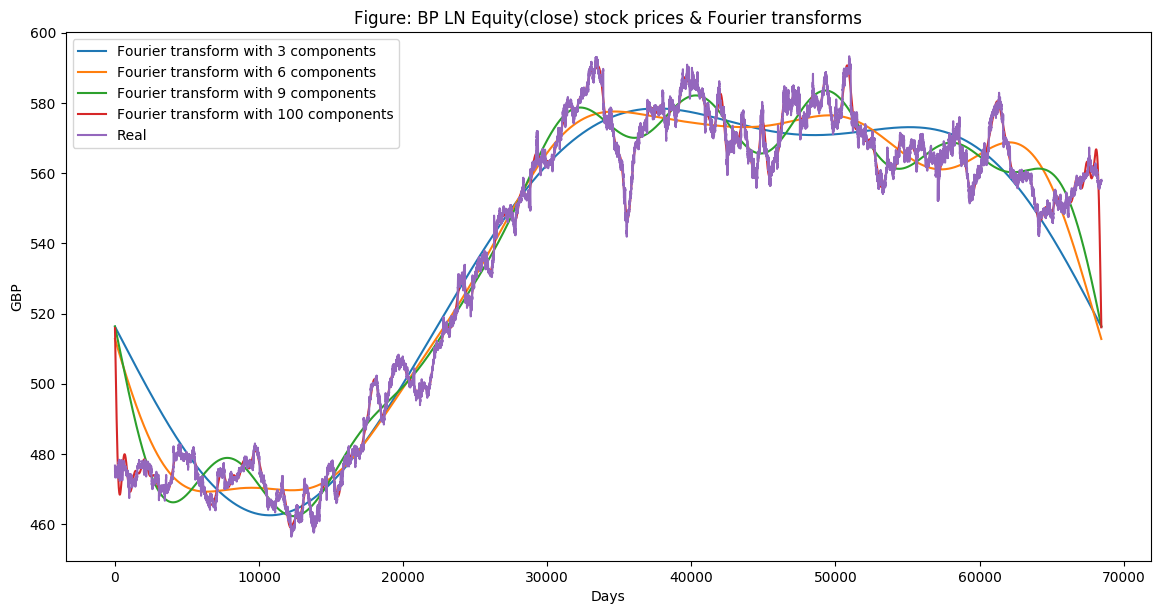

In [0]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: BP LN Equity(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [0]:
data_FT = data_HSBA[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


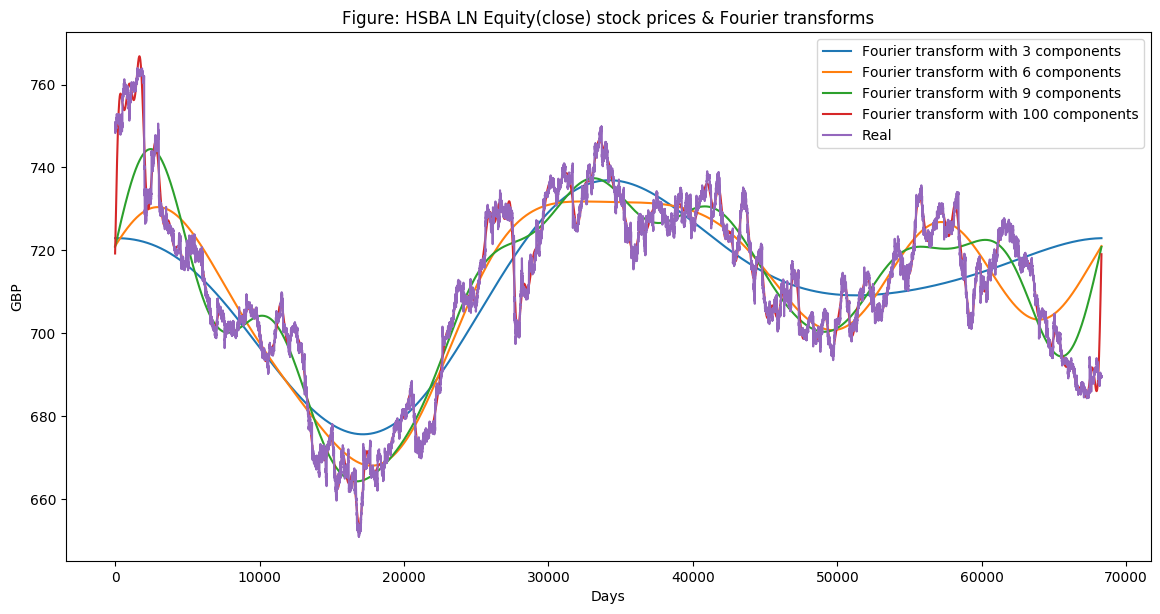

In [0]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: HSBA LN Equity(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [0]:
data_FT = data_GSK[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


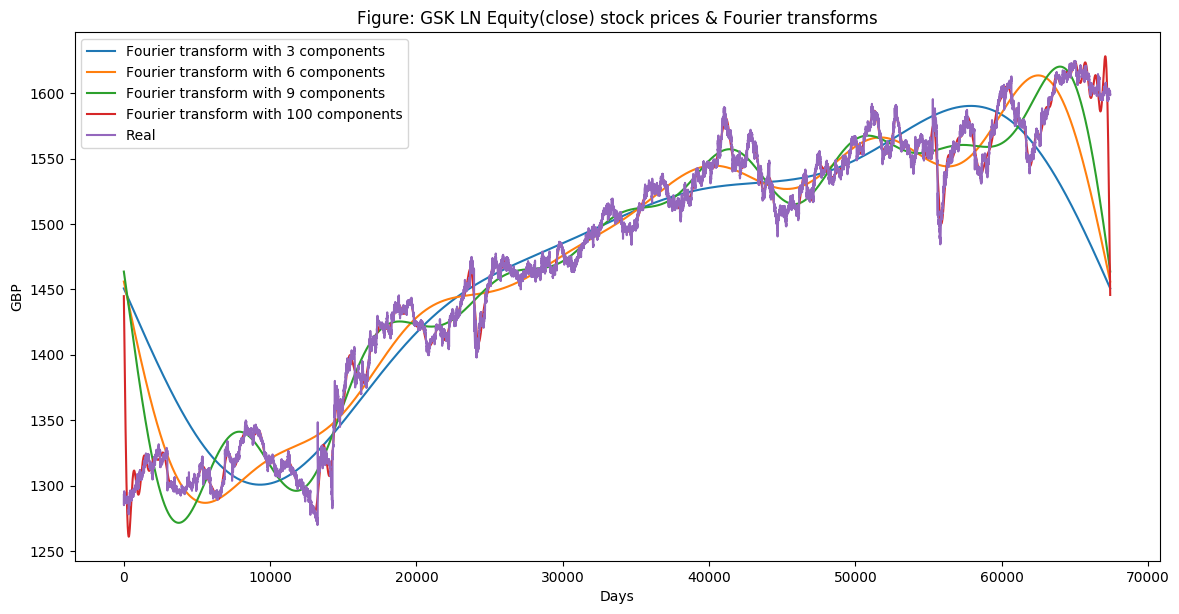

In [0]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: GSK LN Equity(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [0]:
data_FT = data_PPB[['Dates', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


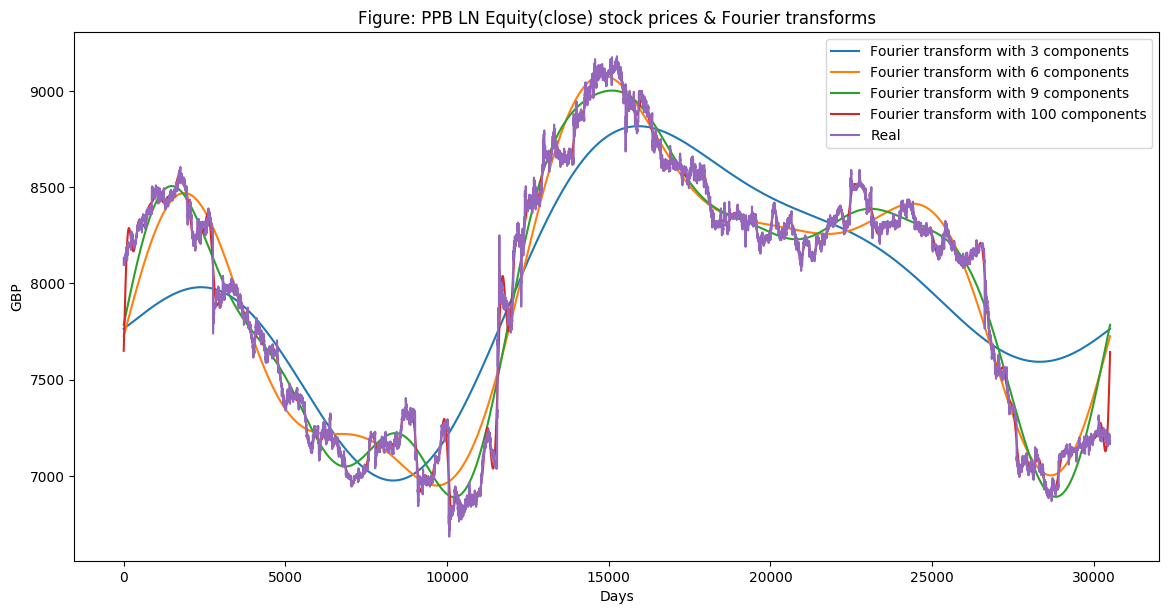

In [0]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: PPB LN Equity(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

As you see in Figure above the more components from the Fourier transform we use, the closer the approximation function is to the real stock price (the 100 components transform is almost identical to the original function - the red and the purple lines almost overlap. We use Fourier transforms for the purpose of extracting long- and short-term trends so we will use the transforms with 3, 6, and 9 components. You can infer that the transform with 3 components serves as the long term trend.

Another technique used to denoise data is call wavelets. Wavelets and Fourier transform gave similar results so we will only use Fourier transforms.

#Technical Indicators
Lot of investors follow technical indicators. We will include the most popular indicators as independent features. Among them - 7 and 21 minutes moving average, exponential moving average, momentum, Bollinger bands, MACD.

# Relevant Features TI

In [0]:
def get_technical_indicators1(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['AAL LN Equity'].rolling(window=7).mean()
    dataset['ma21'] = dataset['AAL LN Equity'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.DataFrame.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.DataFrame.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['26ema'] = dataset['AAL LN Equity'].ewm(span=26).mean()
    dataset['12ema'] = dataset['AAL LN Equity'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['AAL LN Equity'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['AAL LN Equity'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['AAL LN Equity']-1
    
    return dataset

In [0]:
import warnings
warnings.filterwarnings("ignore")
TI_AAL = get_technical_indicators1(new_data)
print('{} Technical Indicators\n'.format(sheets[100]))
print(TI_AAL.head())

AAL LN Equity Technical Indicators

                     WTB LN Equity  WPP LN Equity  ...          ema  momentum
Dates                                              ...                       
2018-02-13 08:03:00         3815.0            NaN  ...          NaN       NaN
2018-02-14 08:04:00         3818.0         1344.5  ...  1676.400000    1675.4
2018-02-14 08:05:00         3815.0         1342.5  ...  1673.850000    1672.0
2018-02-14 08:06:00         3812.0         1343.5  ...  1673.123077    1671.8
2018-02-14 08:07:00         3808.0         1345.0  ...  1674.390000    1674.0

[5 rows x 111 columns]


In [0]:
def get_technical_indicators2(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['BP LN Equity'].rolling(window=7).mean()
    dataset['ma21'] = dataset['BP LN Equity'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.DataFrame.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.DataFrame.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['26ema'] = dataset['BP LN Equity'].ewm(span=26).mean()
    dataset['12ema'] = dataset['BP LN Equity'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['BP LN Equity'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['BP LN Equity'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['BP LN Equity']-1
    
    return dataset

In [0]:
import warnings
warnings.filterwarnings("ignore")
TI_BP = get_technical_indicators2(new_data)
print('{} Technical Indicators\n'.format(sheets[85]))
print(TI_BP.head())

BP LN Equity Technical Indicators

                     WTB LN Equity  WPP LN Equity  ...         ema  momentum
Dates                                              ...                      
2018-02-13 08:03:00         3815.0            NaN  ...         NaN       NaN
2018-02-14 08:04:00         3818.0         1344.5  ...  476.300000    475.30
2018-02-14 08:05:00         3815.0         1342.5  ...  475.437500    474.15
2018-02-14 08:06:00         3812.0         1343.5  ...  475.411538    474.40
2018-02-14 08:07:00         3808.0         1345.0  ...  475.538750    474.60

[5 rows x 111 columns]


In [0]:
def get_technical_indicators3(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['HSBA LN Equity'].rolling(window=7).mean()
    dataset['ma21'] = dataset['HSBA LN Equity'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.DataFrame.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.DataFrame.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['26ema'] = dataset['HSBA LN Equity'].ewm(span=26).mean()
    dataset['12ema'] = dataset['HSBA LN Equity'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['HSBA LN Equity'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['HSBA LN Equity'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['HSBA LN Equity']-1
    
    return dataset

In [0]:
import warnings
warnings.filterwarnings("ignore")
TI_HSBA = get_technical_indicators3(new_data)
print('{} Technical Indicators\n'.format(sheets[63]))
print(TI_HSBA.head())

HSBA LN Equity Technical Indicators

                     WTB LN Equity  WPP LN Equity  ...         ema  momentum
Dates                                              ...                      
2018-02-13 08:03:00         3815.0            NaN  ...         NaN       NaN
2018-02-14 08:04:00         3818.0         1344.5  ...  750.800000     749.8
2018-02-14 08:05:00         3815.0         1342.5  ...  750.275000     749.1
2018-02-14 08:06:00         3812.0         1343.5  ...  750.776923     750.0
2018-02-14 08:07:00         3808.0         1345.0  ...  750.455000     749.3

[5 rows x 111 columns]


In [0]:
def get_technical_indicators4(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['GSK LN Equity'].rolling(window=7).mean()
    dataset['ma21'] = dataset['GSK LN Equity'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.DataFrame.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.DataFrame.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['26ema'] = dataset['GSK LN Equity'].ewm(span=26).mean()
    dataset['12ema'] = dataset['GSK LN Equity'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['GSK LN Equity'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['GSK LN Equity'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['GSK LN Equity']-1
    
    return dataset

In [0]:
import warnings
warnings.filterwarnings("ignore")
TI_GSK = get_technical_indicators4(new_data)
print('{} Technical Indicators\n'.format(sheets[67]))
print(TI_GSK.head())

GSK LN Equity Technical Indicators

                     WTB LN Equity  WPP LN Equity  ...          ema  momentum
Dates                                              ...                       
2018-02-13 08:03:00         3815.0            NaN  ...          NaN       NaN
2018-02-14 08:04:00         3818.0         1344.5  ...  1287.400000    1286.4
2018-02-14 08:05:00         3815.0         1342.5  ...  1286.500000    1285.2
2018-02-14 08:06:00         3812.0         1343.5  ...  1285.461538    1284.0
2018-02-14 08:07:00         3808.0         1345.0  ...  1287.040000    1286.8

[5 rows x 111 columns]


In [0]:
def get_technical_indicators5(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['PPB LN Equity'].rolling(window=7).mean()
    dataset['ma21'] = dataset['PPB LN Equity'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.DataFrame.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.DataFrame.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['26ema'] = dataset['PPB LN Equity'].ewm(span=26).mean()
    dataset['12ema'] = dataset['PPB LN Equity'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['PPB LN Equity'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['PPB LN Equity'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['PPB LN Equity']-1
    
    return dataset

In [0]:
import warnings
warnings.filterwarnings("ignore")
TI_PPB = get_technical_indicators5(new_data)
print('{} Technical Indicators\n'.format(sheets[39]))
print(TI_PPB.head())

PPB LN Equity Technical Indicators

                     WTB LN Equity  WPP LN Equity  ...      ema  momentum
Dates                                              ...                   
2018-02-13 08:03:00         3815.0            NaN  ...      NaN       NaN
2018-02-14 08:04:00         3818.0         1344.5  ...      NaN       NaN
2018-02-14 08:05:00         3815.0         1342.5  ...      NaN       NaN
2018-02-14 08:06:00         3812.0         1343.5  ...  8105.00    8104.0
2018-02-14 08:07:00         3808.0         1345.0  ...  8116.25    8119.0

[5 rows x 111 columns]


# Technical Indicators

In [0]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.DataFrame.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.DataFrame.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['Close'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    
    return dataset

In [0]:
data_TI_AAL = get_technical_indicators(data_AAL[['Close']])
data_TI_BP = get_technical_indicators(data_BP[['Close']])
data_TI_HSBA = get_technical_indicators(data_HSBA[['Close']])
data_TI_GSK = get_technical_indicators(data_GSK[['Close']])
data_TI_PPB = get_technical_indicators(data_PPB[['Close']])
print('AAL LN Equity Technical Indicators\n')
print(data_TI_AAL.head())
print('BP LN Equity Technical Indicators\n')
print(data_TI_BP.head())
print('HSBA LN Equity Technical Indicators\n')
print(data_TI_HSBA.head())
print('GSK LN Equity Technical Indicators\n')
print(data_TI_GSK.head())
print('PPB LN Equity Technical Indicators\n')
print(data_TI_PPB.head())

AAL LN Equity Technical Indicators

    Close  ma7  ma21  ...  lower_band          ema  momentum
0  1679.8  NaN   NaN  ...         NaN  1679.800000    1678.8
1  1680.8  NaN   NaN  ...         NaN  1680.550000    1679.8
2  1679.0  NaN   NaN  ...         NaN  1679.476923    1678.0
3  1675.6  NaN   NaN  ...         NaN  1676.860000    1674.6
4  1676.4  NaN   NaN  ...         NaN  1676.552066    1675.4

[5 rows x 11 columns]
BP LN Equity Technical Indicators

    Close  ma7  ma21       26ema  ...  upper_band  lower_band         ema  momentum
0  476.70  NaN   NaN  476.700000  ...         NaN         NaN  476.700000    475.70
1  476.25  NaN   NaN  476.466346  ...         NaN         NaN  476.362500    475.25
2  475.00  NaN   NaN  475.939502  ...         NaN         NaN  475.419231    474.00
3  474.90  NaN   NaN  475.648903  ...         NaN         NaN  475.068750    473.90
4  476.30  NaN   NaN  475.799895  ...         NaN         NaN  475.892975    475.30

[5 rows x 11 columns]
HSBA LN Equit

In [0]:
def plot_technical_indicators(dataset, last_minutes):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_minutes
    
    dataset = dataset.iloc[-last_minutes:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Figure: Technical indicators for last {} minutes.'.format(last_minutes))
    plt.ylabel('GBP')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

AAL Technical indicators for last 60 minutes


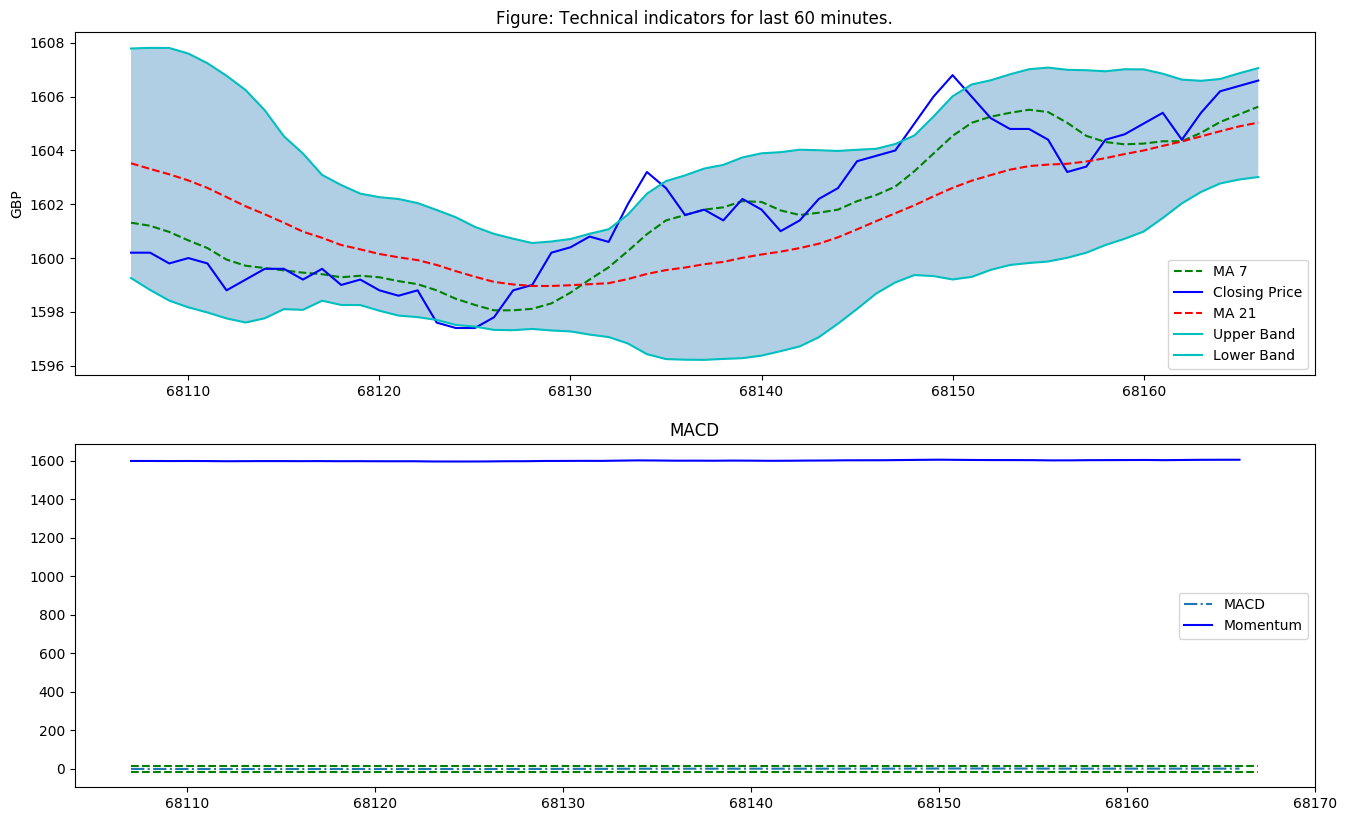

BP Technical indicators for last 60 minutes


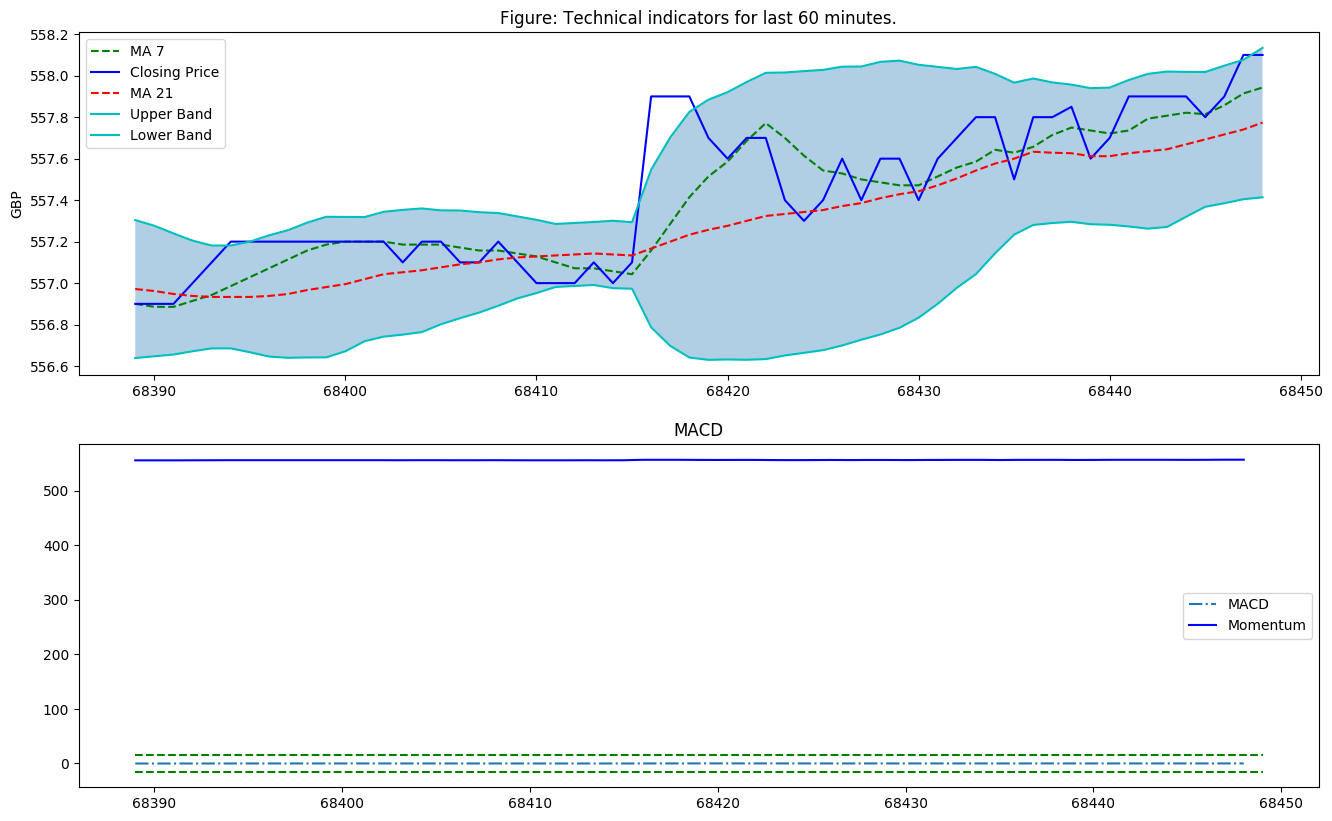

HSBA Technical indicators for last 60 minutes


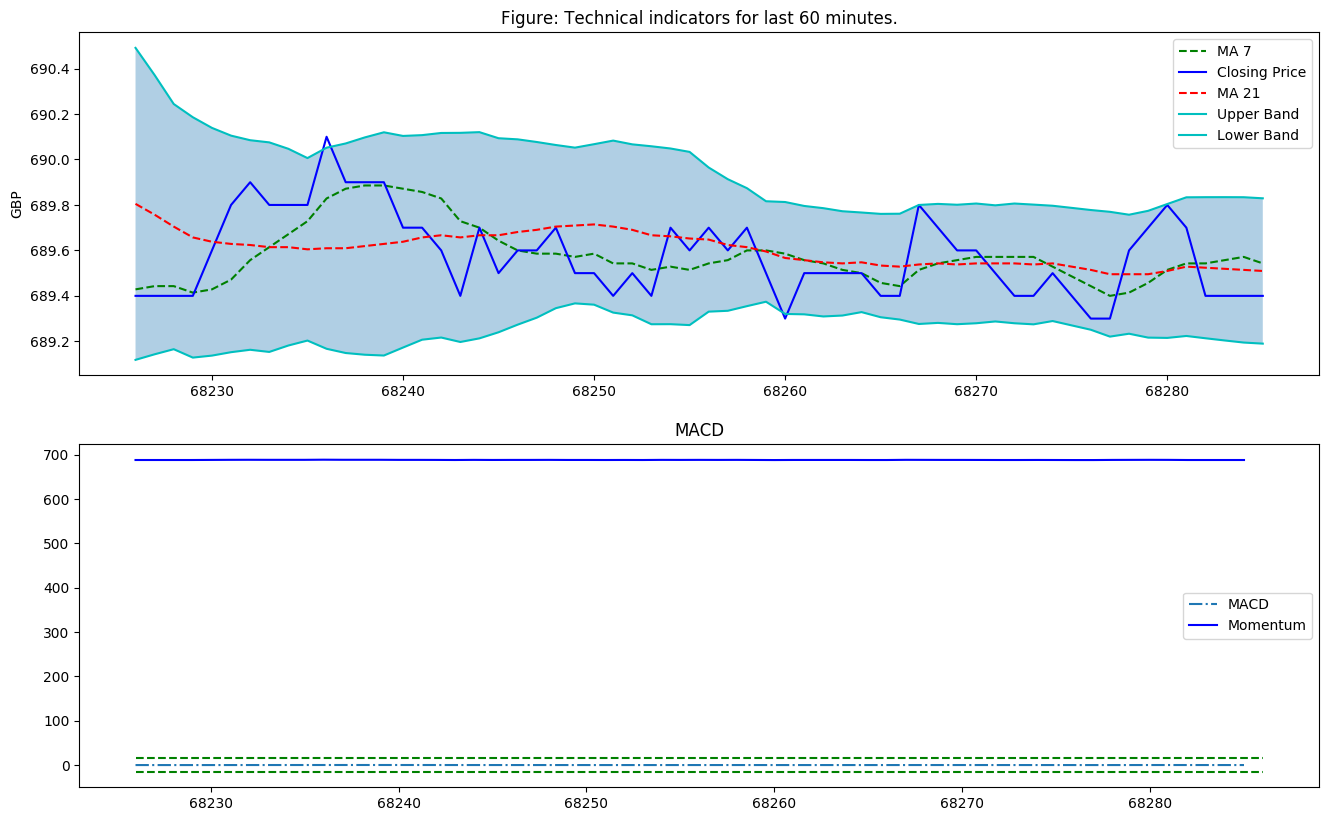

GSK Technical indicators for last 60 minutes


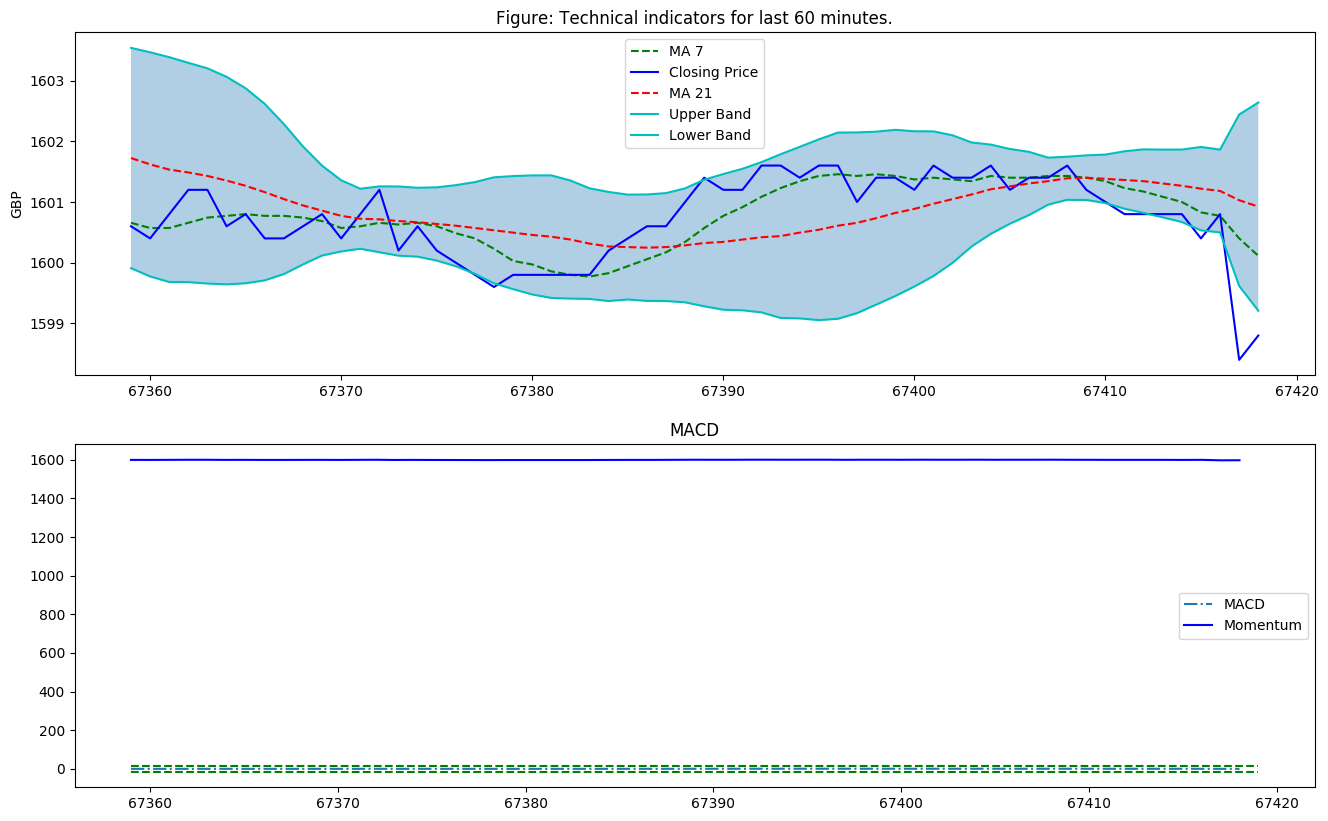

PPB Technical indicators for last 60 minutes


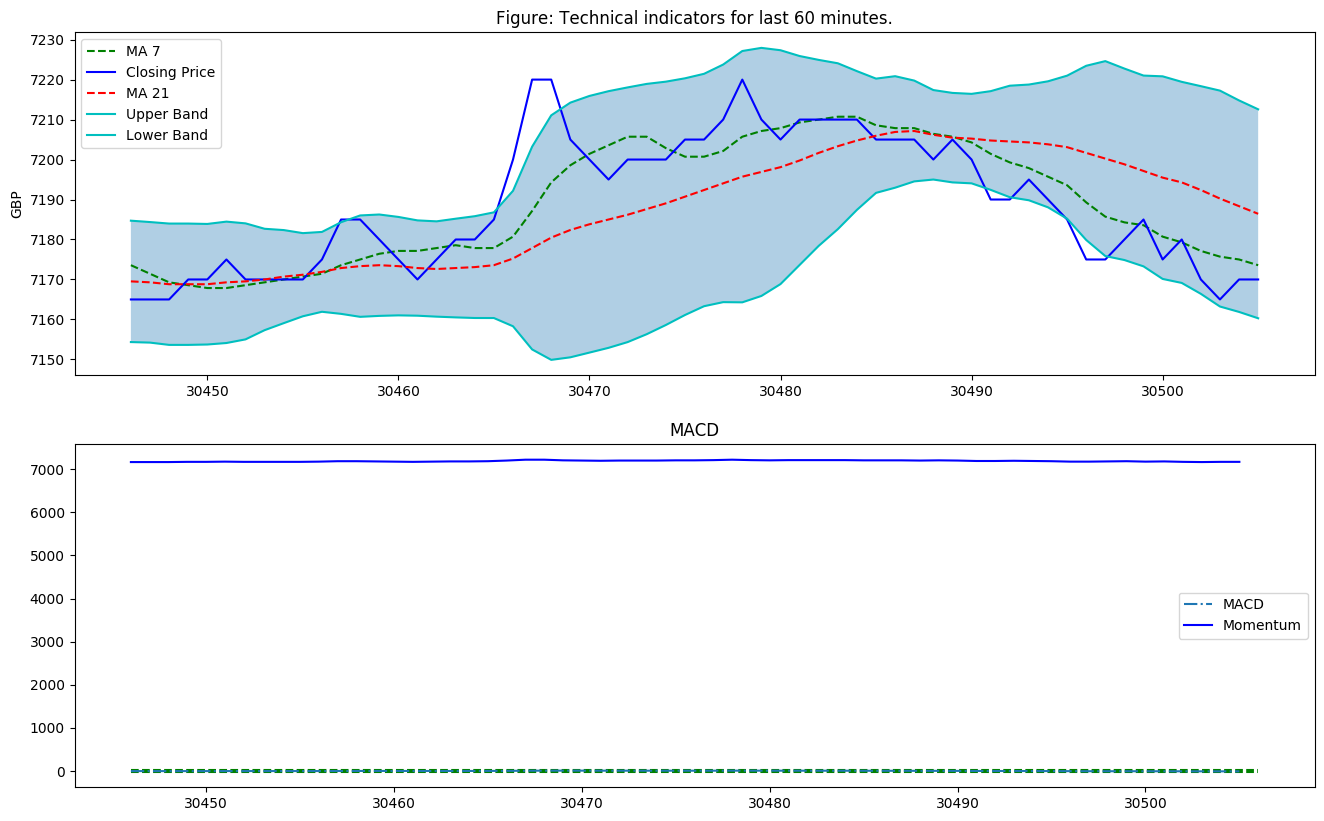

In [0]:
print('AAL Technical indicators for last 60 minutes')
plot_technical_indicators(data_TI_AAL, 60)
print('BP Technical indicators for last 60 minutes')
plot_technical_indicators(data_TI_BP, 60)
print('HSBA Technical indicators for last 60 minutes')
plot_technical_indicators(data_TI_HSBA, 60)
print('GSK Technical indicators for last 60 minutes')
plot_technical_indicators(data_TI_GSK, 60)
print('PPB Technical indicators for last 60 minutes')
plot_technical_indicators(data_TI_PPB, 60)

# Feature Engineering - XGBOOST
Technical Indicators Importance using XGBoost

In [0]:
def get_feature_importance_data(data_income):
    data_AAL = data_income.copy()
    y = data_AAL['Close']
    X = data_AAL.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [0]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data_TI_AAL)

In [0]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=300,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [0]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

[19:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
eval_result = regressor.evals_result()

In [0]:
training_rounds = range(len(eval_result['validation_0']['rmse']))
training_rounds

range(0, 300)

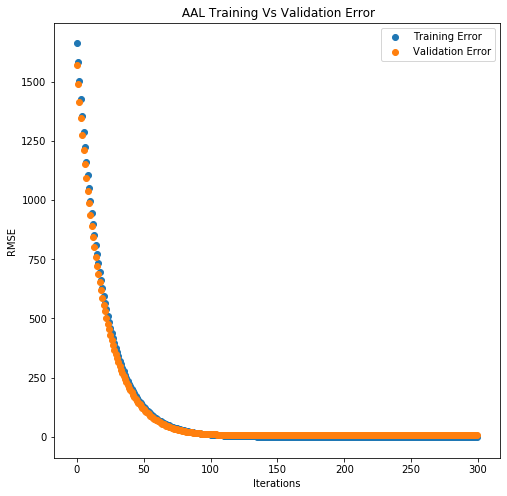

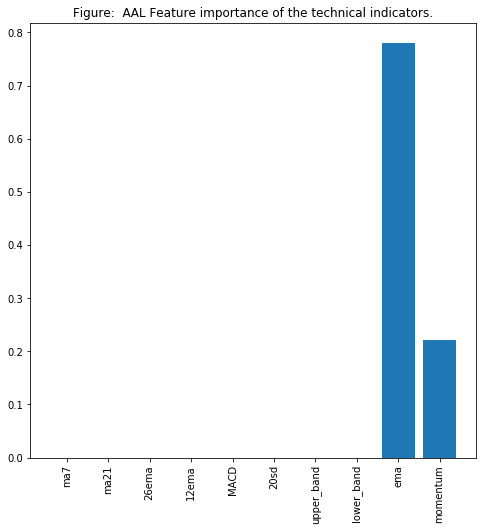

In [0]:
fig = plt.figure(figsize=(8,8))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(' AAL Training Vs Validation Error')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure:  AAL Feature importance of the technical indicators.')
plt.show()

In [0]:
def get_feature_importance_data(data_income):
    data_BP = data_income.copy()
    y = data_BP['Close']
    X = data_BP.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[19:16:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
range(0, 300)


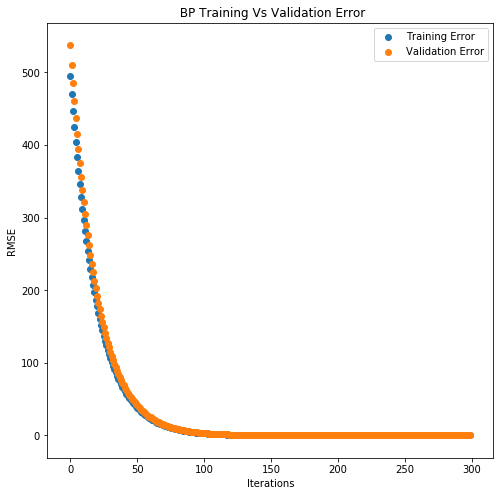

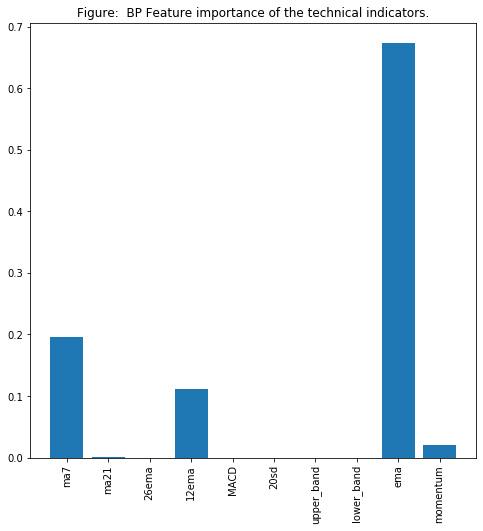

In [0]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data_TI_BP)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=300,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
print(xgbModel)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
print(training_rounds)

fig = plt.figure(figsize=(8,8))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(' BP Training Vs Validation Error')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure:  BP Feature importance of the technical indicators.')
plt.show()

In [0]:
def get_feature_importance_data(data_income):
    data_HSBA = data_income.copy()
    y = data_HSBA['Close']
    X = data_HSBA.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[19:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
range(0, 300)


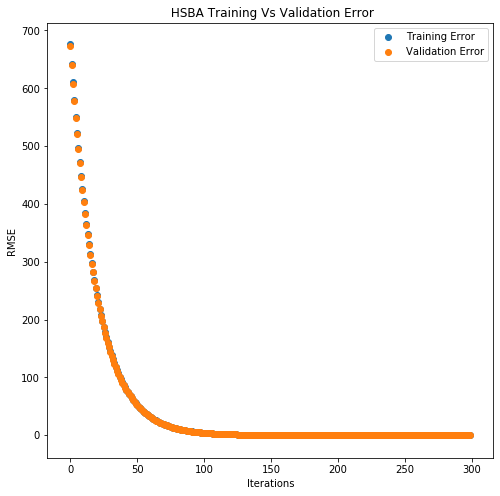

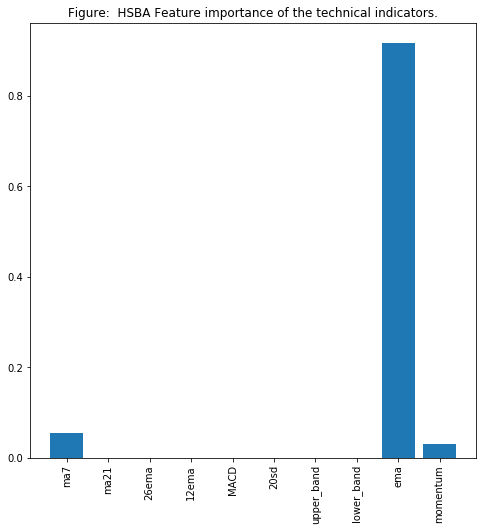

In [0]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data_TI_HSBA)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=300,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
print(xgbModel)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
print(training_rounds)

fig = plt.figure(figsize=(8,8))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(' HSBA Training Vs Validation Error')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure:  HSBA Feature importance of the technical indicators.')
plt.show()

In [0]:
def get_feature_importance_data(data_income):
    data_GSK = data_income.copy()
    y = data_GSK['Close']
    X = data_GSK.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[19:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
range(0, 300)


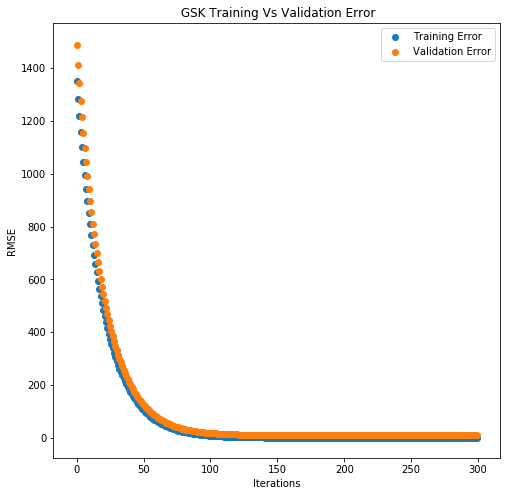

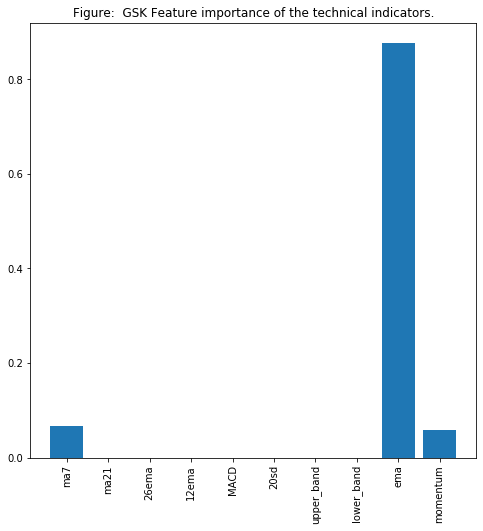

In [0]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data_TI_GSK)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=300,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
print(xgbModel)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
print(training_rounds)

fig = plt.figure(figsize=(8,8))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(' GSK Training Vs Validation Error')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure:  GSK Feature importance of the technical indicators.')
plt.show()

In [0]:
def get_feature_importance_data(data_income):
    data_PPB = data_income.copy()
    y = data_PPB['Close']
    X = data_PPB.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

[19:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
range(0, 300)


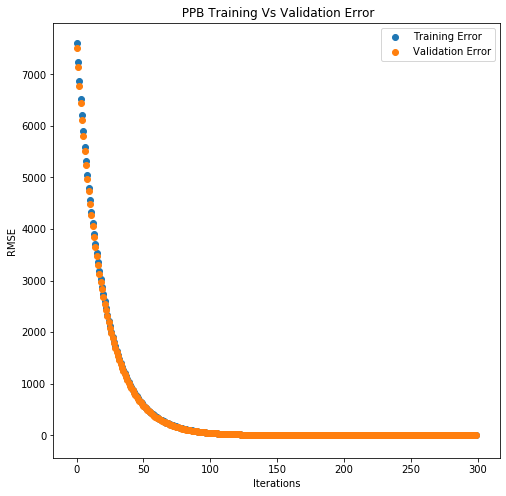

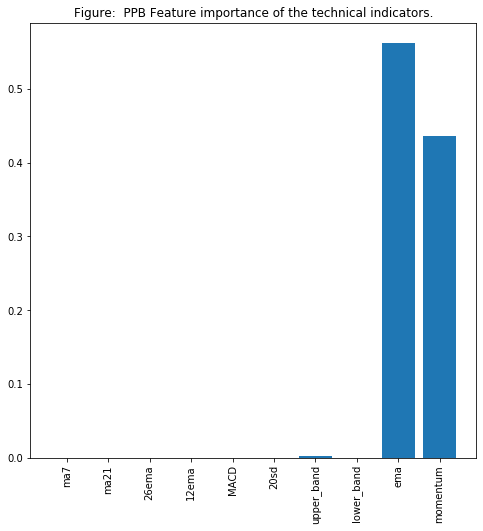

In [0]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data_TI_PPB)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=300,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
print(xgbModel)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
print(training_rounds)

fig = plt.figure(figsize=(8,8))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(' PPB Training Vs Validation Error')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure:  PPB Feature importance of the technical indicators.')
plt.show()

#Reinforcement Learning - Policy Gradient Agent

In [0]:
import tensorflow as tf

In [0]:
class Agent:

    LEARNING_RATE = 1e-4
    LAYER_SIZE = 256
    GAMMA = 0.9
    OUTPUT_SIZE = 3

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.REWARDS = tf.placeholder(tf.float32, (None))
        self.ACTIONS = tf.placeholder(tf.int32, (None))
        feed_forward = tf.layers.dense(self.X, self.LAYER_SIZE, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, self.OUTPUT_SIZE, activation = tf.nn.softmax)
        input_y = tf.one_hot(self.ACTIONS, self.OUTPUT_SIZE)
        loglike = tf.log((input_y * (input_y - self.logits) + (1 - input_y) * (input_y + self.logits)) + 1)
        rewards = tf.tile(tf.reshape(self.REWARDS, (-1,1)), [1, self.OUTPUT_SIZE])
        self.cost = -tf.reduce_mean(loglike * (rewards + 1)) 
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def discount_rewards(self, r):
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(range(0, r.size)):
            running_add = running_add * self.GAMMA + r[t]
            discounted_r[t] = running_add
        return discounted_r
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.get_predicted_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            ep_history = []
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.get_predicted_action(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= close[t]
                
                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                ep_history.append([state,action,starting_money,next_state])
                state = next_state
            ep_history = np.array(ep_history)
            ep_history[:,2] = self.discount_rewards(ep_history[:,2])
            cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict={self.X:np.vstack(ep_history[:,0]),
                                                    self.REWARDS:ep_history[:,2],
                                                    self.ACTIONS:ep_history[:,1]})
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [0]:
df_RL1 = data_AAL[['Dates','Close']]
df_RL2 = data_BP[['Dates','Close']]
df_RL3 = data_HSBA[['Dates','Close']]
df_RL4 = data_GSK[['Dates','Close']]
df_RL5 = data_PPB[['Dates','Close']]

In [0]:
close = df_RL1.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = Agent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

Instructions for updating:
Use keras.layers.Dense instead.


Instructions for updating:
Use keras.layers.Dense instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


epoch: 10, total rewards: 578.300000.3, cost: -7552.413086, total money: 8972.300000
epoch: 20, total rewards: 499.500000.3, cost: -8637.879883, total money: 7292.500000
epoch: 30, total rewards: 437.900000.3, cost: -8705.679688, total money: 7230.900000
epoch: 40, total rewards: -25.100000.3, cost: -8091.904785, total money: 6767.900000
epoch: 50, total rewards: -98.400000.3, cost: -7844.920898, total money: 8295.600000
epoch: 60, total rewards: 242.800000.3, cost: -8420.514648, total money: 10242.800000
epoch: 70, total rewards: 841.800000.3, cost: -9936.625977, total money: 10841.800000
epoch: 80, total rewards: 669.400000.3, cost: -10088.680664, total money: 10669.400000
epoch: 90, total rewards: 361.300000.3, cost: -9697.819336, total money: 10361.300000
epoch: 100, total rewards: 453.000000.3, cost: -10031.375977, total money: 10453.000000
epoch: 110, total rewards: 185.300000.3, cost: -10302.564453, total money: 10185.300000
epoch: 120, total rewards: 345.000000.3, cost: -10409.

In [0]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

Streaming output truncated to the last 5000 lines.
day 58753: buy 1 unit at price 1667.800000, total balance 3154.700000
day 58755: buy 1 unit at price 1669.800000, total balance 1484.900000
day 58761, sell 1 unit at price 1667.600000, investment -0.131752 %, total balance 3152.500000,
day 58762: buy 1 unit at price 1667.000000, total balance 1485.500000
day 58771, sell 1 unit at price 1671.200000, investment 0.095831 %, total balance 3156.700000,
day 58772: buy 1 unit at price 1671.000000, total balance 1485.700000
day 58773, sell 1 unit at price 1671.600000, investment 0.155782 %, total balance 3157.300000,
day 58774, sell 1 unit at price 1671.400000, investment 0.215853 %, total balance 4828.700000,
day 58775, sell 1 unit at price 1671.400000, investment 0.095820 %, total balance 6500.100000,
day 58776: buy 1 unit at price 1670.400000, total balance 4829.700000
day 58777, sell 1 unit at price 1671.200000, investment 0.251950 %, total balance 6500.900000,
day 58778: buy 1 unit at pri

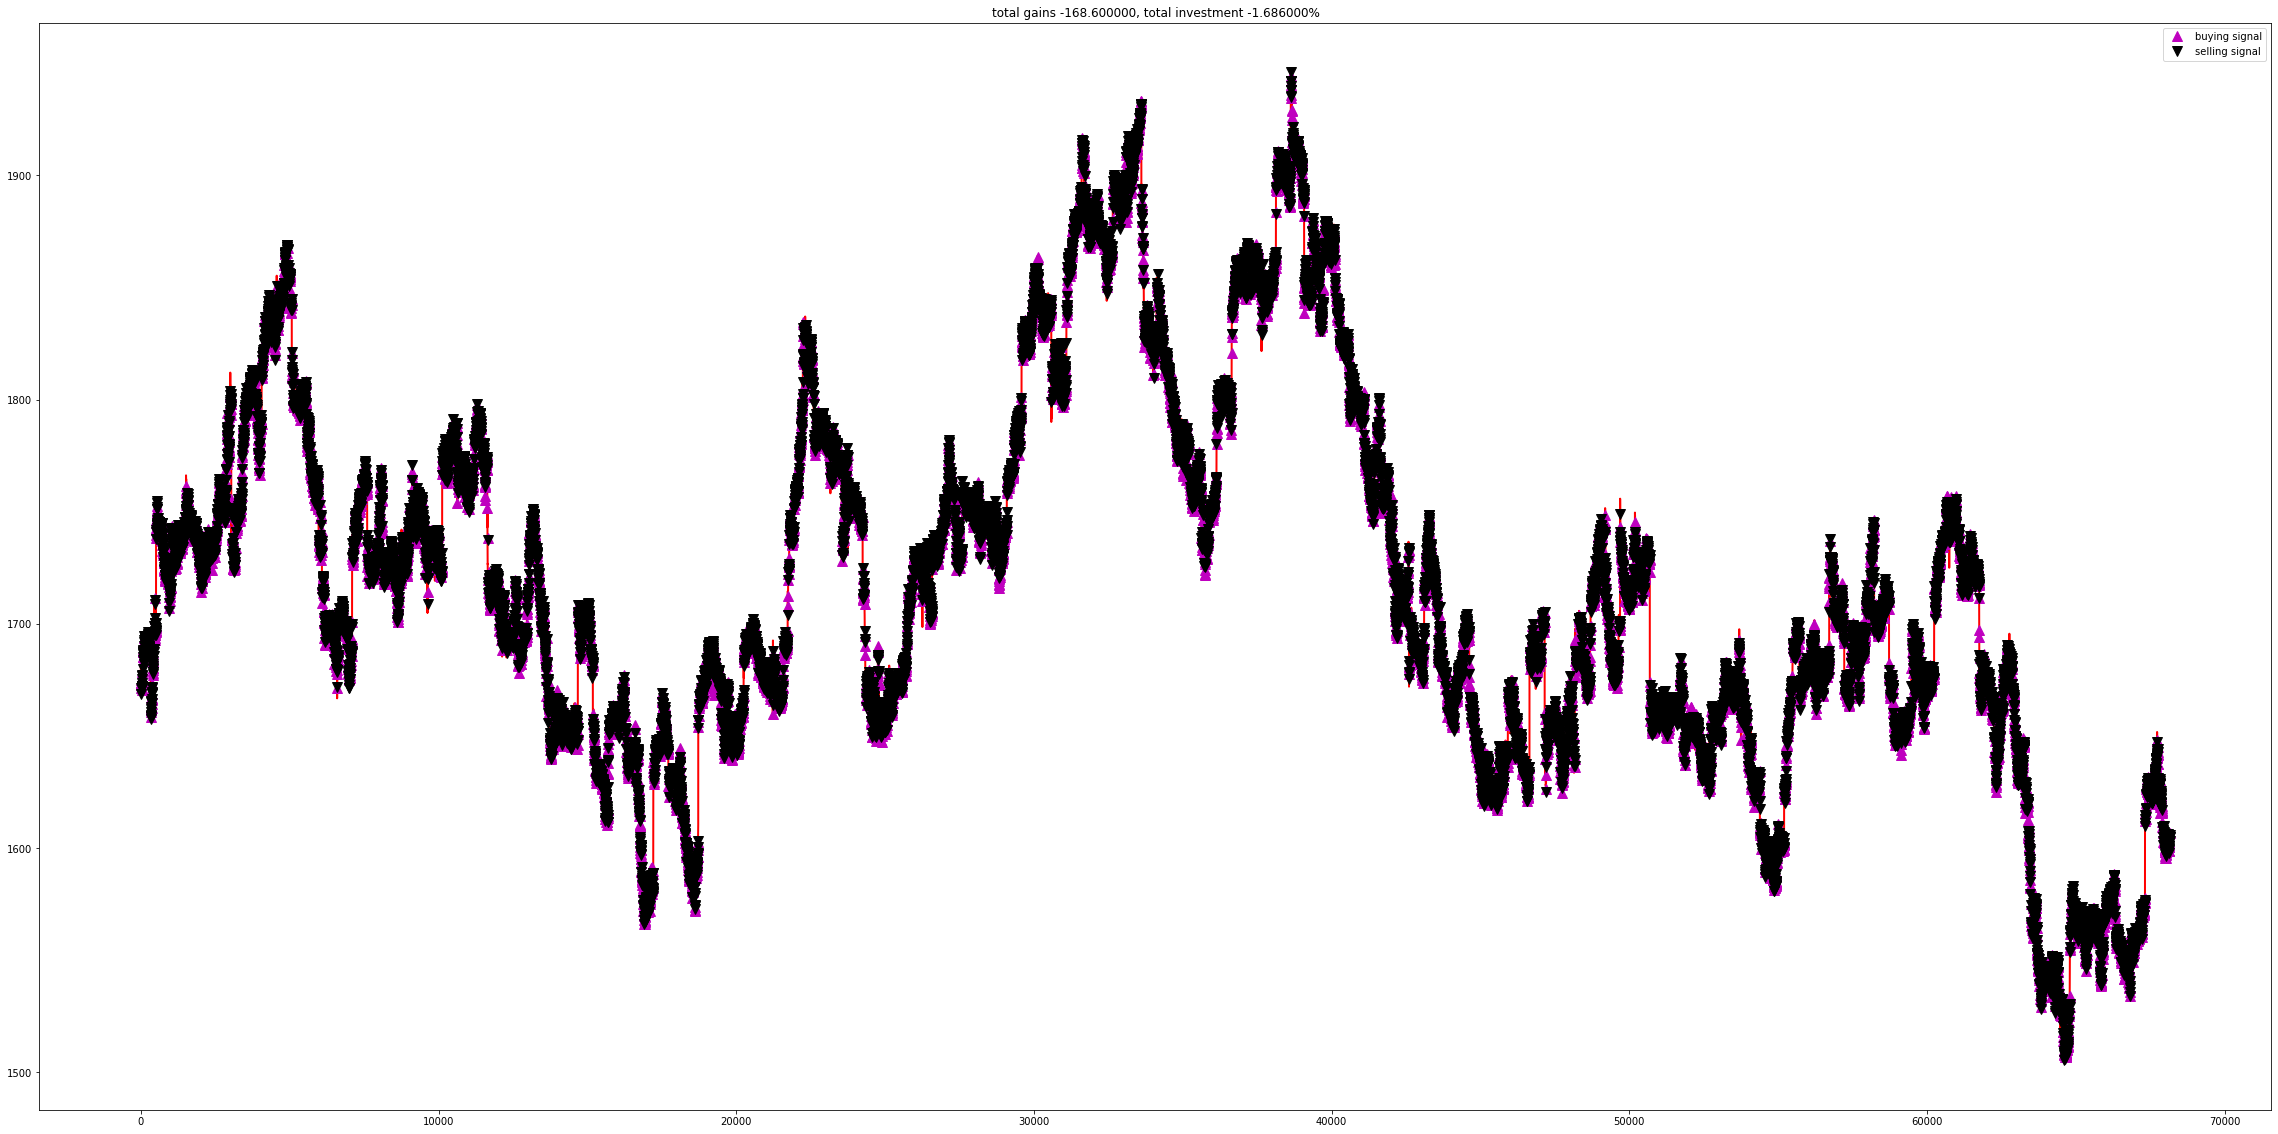

In [0]:
fig = plt.figure(figsize = (40,20))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

In [0]:
class Agent:

    LEARNING_RATE = 1e-4
    LAYER_SIZE = 256
    GAMMA = 0.9
    OUTPUT_SIZE = 3

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.REWARDS = tf.placeholder(tf.float32, (None))
        self.ACTIONS = tf.placeholder(tf.int32, (None))
        feed_forward = tf.layers.dense(self.X, self.LAYER_SIZE, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, self.OUTPUT_SIZE, activation = tf.nn.softmax)
        input_y = tf.one_hot(self.ACTIONS, self.OUTPUT_SIZE)
        loglike = tf.log((input_y * (input_y - self.logits) + (1 - input_y) * (input_y + self.logits)) + 1)
        rewards = tf.tile(tf.reshape(self.REWARDS, (-1,1)), [1, self.OUTPUT_SIZE])
        self.cost = -tf.reduce_mean(loglike * (rewards + 1)) 
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def discount_rewards(self, r):
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(range(0, r.size)):
            running_add = running_add * self.GAMMA + r[t]
            discounted_r[t] = running_add
        return discounted_r
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.get_predicted_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            ep_history = []
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.get_predicted_action(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= close[t]
                
                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                ep_history.append([state,action,starting_money,next_state])
                state = next_state
            ep_history = np.array(ep_history)
            ep_history[:,2] = self.discount_rewards(ep_history[:,2])
            cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict={self.X:np.vstack(ep_history[:,0]),
                                                    self.REWARDS:ep_history[:,2],
                                                    self.ACTIONS:ep_history[:,1]})
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [0]:
close = df_RL2.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = Agent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

NameError: ignored

#Forecast - LSTM


In [0]:
#forecast 30 days ahead! So just change test_size to forecast t + N ahead.
# simulate 10 times, 10 variances of forecasted patterns by changing simulation_size.
df1 =  data_AAL
minmax = MinMaxScaler().fit(df1.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df1.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()


Dates   Close
0 2018-02-13 08:01:00  8100.0
1 2018-02-14 08:02:00  8115.0
2 2018-02-14 08:06:00  8105.0
3 2018-02-14 08:07:00  8120.0
4 2018-02-14 08:08:00  8130.0

In [0]:
simulation_size = 10
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 30
learning_rate = 0.01

df_train = df_log
df1.shape, df_train.shape

In [0]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [0]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.4)
    
    return deep_future

In [0]:
tf.compat.v1.random.set_random_seed(1234)

In [0]:
from tqdm import tqdm
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

In [0]:
date_ori = pd.to_datetime(df1.iloc[:, 0]).tolist()
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(days = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d').tolist()
date_ori[-5:]

#Sanity Check
Some of our models might not have stable gradient, so forecasted trend might really hangwired. You can use many methods to filter out unstable models. 
This method is very simple,

If one of element in forecasted trend lower than min(original trend).
If one of element in forecasted trend bigger than max(original trend) * 2.
If both are true, reject that trend.

In [0]:
accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(df['Close'])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(df['Close']) * 2).sum() == 0:
        accepted_results.append(r)
len(accepted_results)

In [0]:
accuracies = [calculate_accuracy(df['Close'].values, r[:-test_size]) for r in accepted_results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['Close'], label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::30], date_ori[::30])

plt.show()